<font size="+3.8">Scanpy single-cell pre-processing</font>  
<font size="+1.5"></font>  

Aim: Preprocess mouse brain single-cell data from Winkler 2022 Science (human adult brain - healthy controls only)  
Publication: https://pubmed.ncbi.nlm.nih.gov/35084939/

In [1]:
from datetime import date
date.today().strftime('%d/%m/%Y')

'22/01/2024'

In [2]:
import os
os.getlogin()

'sfrerich'

In [3]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from datetime import date
from matplotlib.pyplot import rc_context

In [4]:
os.environ['CONDA_DEFAULT_ENV'] # conda env

'scanpy'

In [5]:
platform.platform()

'Windows-10-10.0.14393-SP0'

In [6]:
sc.settings.verbosity = 3

In [7]:
main_dir='/run/user/1000/gvfs/smb-share:server=138.245.4.35,share=bd-dichgans/SF' # Linux

In [8]:
main_dir='\\\isdsynnas.srv.med.uni-muenchen.de\BD-Dichgans\SF' # Win

In [9]:
main_dir='/Volumes/BD-Dichgans/SF' # Mac

# Load data

## Annotated 
Downloaded from: https://cells.ucsc.edu/?bp=brain&dis=Healthy~Healthy+Control&org=Human+(H.+sapiens)&ds=adult-brain-vasc

### EC dataset

In [ ]:
#ad = sc.read_text(main_dir+"\\P06_vasc_scRNAseq\\Winkler2022\\ucsc_cellbrowser_data\\EC\\exprMatrix.tsv.gz").transpose()
#original_cellnames = ad.obs

In [9]:
ad = sc.read_text(main_dir+"/P06_vasc_scRNAseq/Winkler2022/ucsc_cellbrowser_data/EC/exprMatrix.tsv.gz").transpose()
original_cellnames = ad.obs

In [10]:
#meta = pd.read_csv(main_dir+"//P06_vasc_scRNAseq\\Winkler2022\\ucsc_cellbrowser_data\\EC\\meta.tsv", sep="\t")
#ad.obs = meta
#ad

In [11]:
meta = pd.read_csv(main_dir+"/P06_vasc_scRNAseq/Winkler2022/ucsc_cellbrowser_data/EC/meta.tsv", sep="\t")
ad.obs = meta
ad

AnnData object with n_obs × n_vars = 5018 × 29492
    obs: 'Cell', 'orig.ident', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'Sample', 'nCount_combined', 'nFeature_combined', 'percent.mt', 'doublet2', 'doublet3', 'softmax', 'nCount_SCT', 'nFeature_SCT', 'clusters', 'Art_UCell', 'Cap_UCell', 'Venous_UCell', 'Venule_UCell', 'Cluster'

In [12]:
ad.obs.columns

Index(['Cell', 'orig.ident', 'nCount_spliced', 'nFeature_spliced',
       'nCount_unspliced', 'nFeature_unspliced', 'Sample', 'nCount_combined',
       'nFeature_combined', 'percent.mt', 'doublet2', 'doublet3', 'softmax',
       'nCount_SCT', 'nFeature_SCT', 'clusters', 'Art_UCell', 'Cap_UCell',
       'Venous_UCell', 'Venule_UCell', 'Cluster'],
      dtype='object')

In [13]:
ad.obs.head(2)

Cell orig.ident  nCount_spliced  nFeature_spliced  \
0  GGTGTCGTCAACTGAC_9  ctrl085_L      38258.9096              5725   
1  TCATTCAAGACGCTCC_9  ctrl085_L      43172.4200              6623   

   nCount_unspliced  nFeature_unspliced   Sample  nCount_combined  \
0        23647.0904                5208  CTRL085          61906.0   
1        25432.5800                5587  CTRL085          68605.0   

   nFeature_combined  percent.mt  ... doublet3   softmax  nCount_SCT  \
0               8533    8.001521  ...  Singlet  0.022721        5530   
1               9549    8.604769  ...  Singlet  0.006188        5127   

   nFeature_SCT  clusters Art_UCell  Cap_UCell  Venous_UCell  Venule_UCell  \
0          2441    Venous  0.348467   0.291344      0.824233      0.095844   
1          2498      Art1  0.701656   0.210244      0.223356      0.061833   

   Cluster  
0   Venous  
1     Art1  

[2 rows x 21 columns]

In [14]:
assert(all(ad.obs["Cell"] == original_cellnames.index))

In [15]:
ad.obs["Sample"].unique()

array(['CTRL085', 'CTRL086', 'CTRL099_21', 'CTRL099_22', 'CTRL12'],
      dtype=object)

In [16]:
# add umap coords
#umap = pd.read_csv(main_dir+"\\P06_vasc_scRNAseq\\Winkler2022\\ucsc_cellbrowser_data\\EC\\Seurat_umap.coords.tsv.gz", sep="\t", header=None)
#ad.obsm['X_umap'] = umap[[1,2]].to_numpy()

In [17]:
# add umap coords
umap = pd.read_csv(main_dir+"/P06_vasc_scRNAseq/Winkler2022/ucsc_cellbrowser_data/EC/Seurat_umap.coords.tsv.gz", sep="\t", header=None)
ad.obsm['X_umap'] = umap[[1,2]].to_numpy()

In [18]:
ad = ad[(ad.obs.doublet2 != 'Doublet') & (ad.obs.doublet3 != 'Doublet')] # remove doublets

In [19]:
del ad.obs['clusters']

In [20]:
ad.obs['Cluster']

0       Venous
1         Art1
2       Venous
3       Venous
4       Venous
         ...  
5013       Cap
5014    Venule
5015      Art2
5016    Venule
5017       Cap
Name: Cluster, Length: 4950, dtype: object

In [21]:
ad.obs["clusters2"] = 'ECs_' + ad.obs['Cluster'].astype(str)

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_10044\950043674.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ad.obs["clusters2"] = 'ECs_' + ad.obs['Cluster'].astype(str)
D:\Programme\Anaconda\envs\scanpy\Lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [22]:
ad.obs["clusters2"] = 'ECs_' + ad.obs['Cluster'].astype(str)

In [23]:
ad.obs['clusters2'].unique()

array(['ECs_Venous', 'ECs_Art1', 'ECs_Art3', 'ECs_Cap', 'ECs_Art2',
       'ECs_Venule'], dtype=object)

In [24]:
# merge subclusters
new_names = {
    'ECs_Arterial': {'ECs_Art1','ECs_Art2','ECs_Art3'},
    'ECs_Capillary': {'ECs_Cap'},
    'ECs_Venous': {'ECs_Venous','ECs_Venule'},
    'Pericytes': {'PC'},
    'SMCs': {'aSMC','aaSMC','vSMC'},
    'Oligos': {'OL'},
    'Fibroblasts': {'FB1', 'FB2'},
    'Microglia': {'MG'},
    'Astrocytes': {'AC'}
}
# re-format
result = {}
for key, value in new_names.items():
    for elem in value:
        result[(elem)] = key
new_cluster_names = dict(sorted(result.items()))
print(new_cluster_names)

{'AC': 'Astrocytes', 'ECs_Art1': 'ECs_Arterial', 'ECs_Art2': 'ECs_Arterial', 'ECs_Art3': 'ECs_Arterial', 'ECs_Cap': 'ECs_Capillary', 'ECs_Venous': 'ECs_Venous', 'ECs_Venule': 'ECs_Venous', 'FB1': 'Fibroblasts', 'FB2': 'Fibroblasts', 'MG': 'Microglia', 'OL': 'Oligos', 'PC': 'Pericytes', 'aSMC': 'SMCs', 'aaSMC': 'SMCs', 'vSMC': 'SMCs'}


In [25]:
# fine annotation
ad.obs['clusters2'] = (
    ad.obs['clusters2']
    .map(new_cluster_names)
    .astype('category')
)

In [26]:
ad.obs['clusters2'].unique()

['ECs_Venous', 'ECs_Arterial', 'ECs_Capillary']
Categories (3, object): ['ECs_Arterial', 'ECs_Capillary', 'ECs_Venous']

In [27]:
ad.obs['clusters'] = "ECs"

D:\Programme\Anaconda\envs\scanpy\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


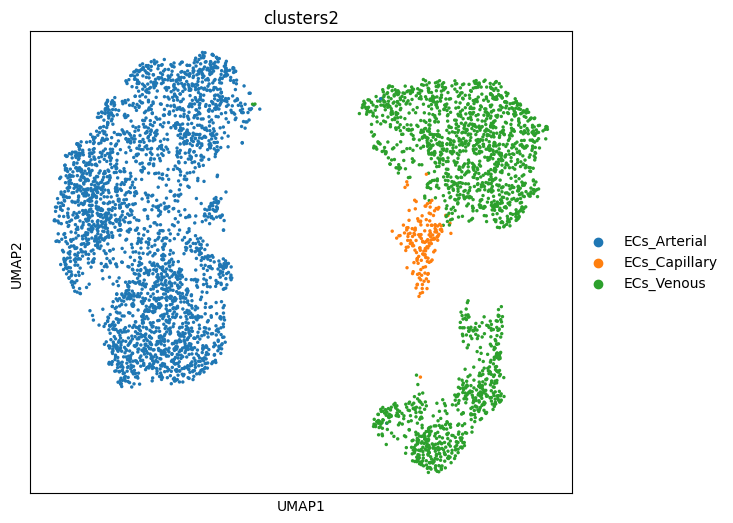

In [28]:
with rc_context({'figure.figsize': (7, 6)}):
    sc.pl.umap(ad, color=['clusters2'])

Check if data is normalized:

In [29]:
ad.layers

Layers with keys: 

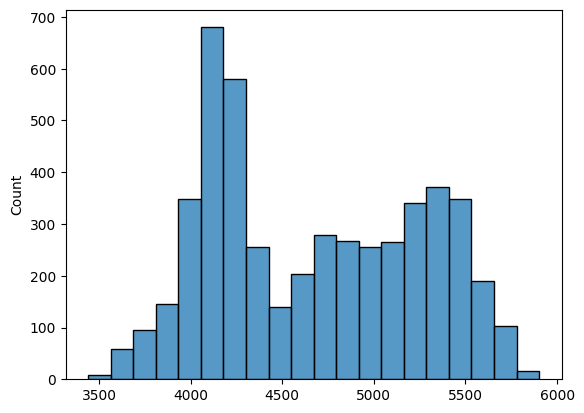

In [30]:
sns.histplot(ad.X.sum(1))
plt.show()

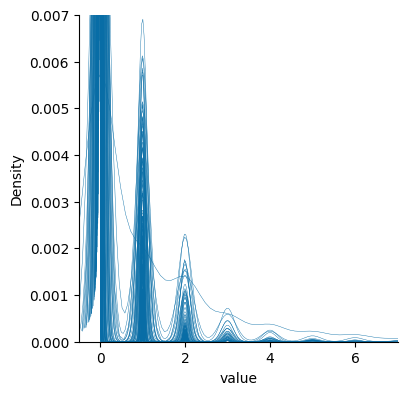

In [31]:
# show expression of 100 random genes (across all spots)
import random
random_genes=random.sample(range(0, ad.X.shape[1]), 100)
adata_sub = ad[:,random_genes]
exp=pd.DataFrame(np.matrix(adata_sub.X))
# plot
pl1=sns.displot(data=pd.melt(exp),x='value',height=4,hue='variable',kind="kde",warn_singular=False,legend=False,palette=list(np.repeat('#086da6',100)), lw=0.3) # genes with 0 expression are excluded
pl1.set(xlim=(-0.5, 7),ylim=(0,0.007));
plt.show()

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_10044\3027945264.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  pl=sns.histplot(data=pd.melt(exp),x='value',binwidth=0.5,legend=True,palette=list(np.repeat('#086da6',100)))


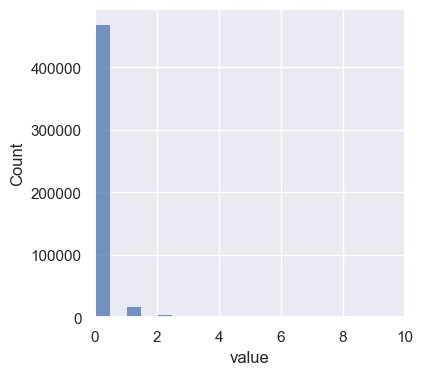

In [32]:
sns.set(rc={'figure.figsize':(4,4)})
pl=sns.histplot(data=pd.melt(exp),x='value',binwidth=0.5,legend=True,palette=list(np.repeat('#086da6',100)))
pl.set(xlim=(0, 10));
sns.set_style("ticks")
plt.show()

Data is not normalized, therefore normalize and log-transform

In [33]:
ad.layers["counts"] = ad.X.copy() # save unnormalized raw RNA counts - retrieve via ad.X = ad.layers["counts"]

In [34]:
sc.pp.normalize_total(ad, inplace=True) # Normalize each spot by total counts over all genes, so that every spot has the same total count after normalization.

normalizing counts per cell
    finished (0:00:00)


In [35]:
sc.pp.log1p(ad) # X = log(X + 1)

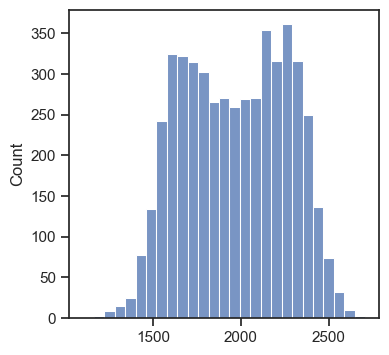

In [36]:
sns.histplot(ad.X.sum(1))
plt.show()

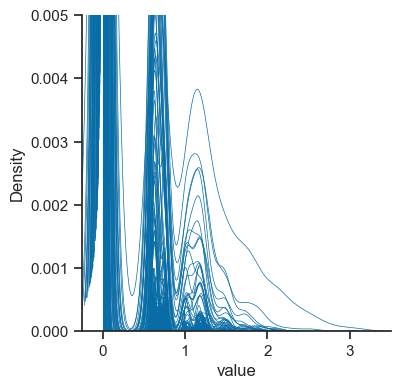

In [37]:
# show expression of 100 random genes (across all spots)
adata_sub = ad[:,random_genes]
exp=pd.DataFrame(np.matrix(adata_sub.X))
# plot
pl=sns.displot(data=pd.melt(exp),x='value',height=4,hue='variable',kind="kde",warn_singular=False,legend=False,palette=list(np.repeat('#086da6',100)), lw=0.5) # genes with 0 expression are excluded
pl.set(xlim=(-0.25, 3.5),ylim=(0,0.005));
plt.show()

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_10044\2170774648.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  pl=sns.histplot(data=pd.melt(exp),x='value',binwidth=0.5,legend=True,palette=list(np.repeat('#086da6',100)));


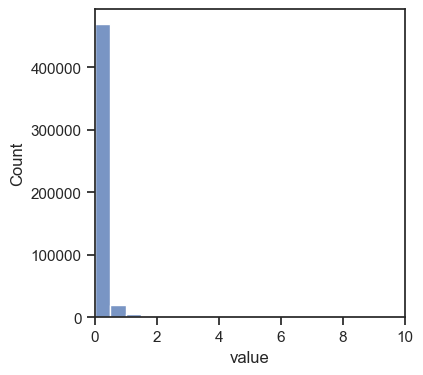

In [38]:
pl=sns.histplot(data=pd.melt(exp),x='value',binwidth=0.5,legend=True,palette=list(np.repeat('#086da6',100)));
pl.set(xlim=(0, 10));
plt.show()

In [39]:
ad.layers["normalized"] = ad.X.copy() # save normalized + log-transformed (but unscaled) counts - retrieve via adata.X = adata.layers["normalized"]

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


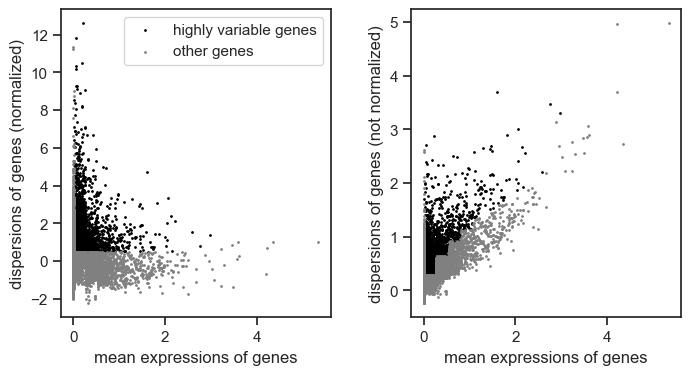

In [40]:
# Identify highly-variable genes
sc.pp.highly_variable_genes(ad)
sc.pl.highly_variable_genes(ad)

In [41]:
ad

AnnData object with n_obs × n_vars = 4950 × 29492
    obs: 'Cell', 'orig.ident', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'Sample', 'nCount_combined', 'nFeature_combined', 'percent.mt', 'doublet2', 'doublet3', 'softmax', 'nCount_SCT', 'nFeature_SCT', 'Art_UCell', 'Cap_UCell', 'Venous_UCell', 'Venule_UCell', 'Cluster', 'clusters2', 'clusters'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters2_colors', 'log1p', 'hvg'
    obsm: 'X_umap'
    layers: 'counts', 'normalized'

In [42]:
ad.layers

Layers with keys: counts, normalized

In [43]:
winkler_ec = ad

In [44]:
del ad

### Perivascular dataset

In [45]:
ad = sc.read_text(main_dir+"//P06_vasc_scRNAseq//Winkler2022//ucsc_cellbrowser_data//Perivascular//exprMatrix.tsv.gz").transpose()
original_cellnames = ad.obs

In [46]:
meta = pd.read_csv(main_dir+"//P06_vasc_scRNAseq//Winkler2022//ucsc_cellbrowser_data//Perivascular//meta.tsv", sep="\t")
ad.obs = meta
ad

AnnData object with n_obs × n_vars = 49553 × 36138
    obs: 'cellId', 'orig.ident', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'Sample', 'nCount_combined', 'nFeature_combined', 'percent.mt', 'softmax', 'nCount_SCT', 'nFeature_SCT', 'clusters', 'FBMC_score', 'SMC_score', 'FB_score', 'PC_score', 'sub_clusters'

In [47]:
ad.obs.columns

Index(['cellId', 'orig.ident', 'nCount_spliced', 'nFeature_spliced',
       'nCount_unspliced', 'nFeature_unspliced', 'Sample', 'nCount_combined',
       'nFeature_combined', 'percent.mt', 'softmax', 'nCount_SCT',
       'nFeature_SCT', 'clusters', 'FBMC_score', 'SMC_score', 'FB_score',
       'PC_score', 'sub_clusters'],
      dtype='object')

In [48]:
ad.obs.head(2)

cellId orig.ident  nCount_spliced  nFeature_spliced  \
0  GCGTGCACAATCCTTT_9  ctrl085_L    45786.477119              6851   
1  TCGGTCTCACATAACC_9  ctrl085_L    58604.482805              7658   

   nCount_unspliced  nFeature_unspliced   Sample  nCount_combined  \
0      18618.522899                5258  CTRL085     64405.000018   
1      22669.517186                5735  CTRL085     81273.999990   

   nFeature_combined  percent.mt   softmax  nCount_SCT  nFeature_SCT clusters  \
0               9527    8.891061  0.003459        5009          2365     FBMC   
1              10382    8.676364  0.006037        5001          2388     FBMC   

   FBMC_score  SMC_score  FB_score  PC_score sub_clusters  
0    0.853494  -0.115504  0.312556  0.014801        FBMC2  
1    1.030248   0.097485  0.466670  0.020408        FBMC2

In [49]:
assert(all(ad.obs["cellId"] == original_cellnames.index))

In [50]:
ad.obs["Sample"].unique()

array(['CTRL085', 'CTRL086', 'CTRL099_21', 'CTRL099_22', 'CTRL12'],
      dtype=object)

In [51]:
# add umap coords
umap = pd.read_csv(main_dir+"//P06_vasc_scRNAseq//Winkler2022//ucsc_cellbrowser_data//Perivascular//UMAP.coords.tsv.gz", sep="\t", header=None)
ad.obsm['X_umap'] = umap[[1,2]].to_numpy()

In [52]:
# no doublets defined in obs
# ad = ad[(ad.obs.doublet2 != 'Doublet') & (ad.obs.doublet3 != 'Doublet')] # remove doublets

In [53]:
# Renaming
old_to_new = {'FB':'Fibroblasts','FBMC':'Fibromyocytes','PC':'Pericytes','SMC':'SMCs'}
ad.obs['clusters2'] = (
    ad.obs['clusters'].map(old_to_new).astype('category')
)

D:\Programme\Anaconda\envs\scanpy\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


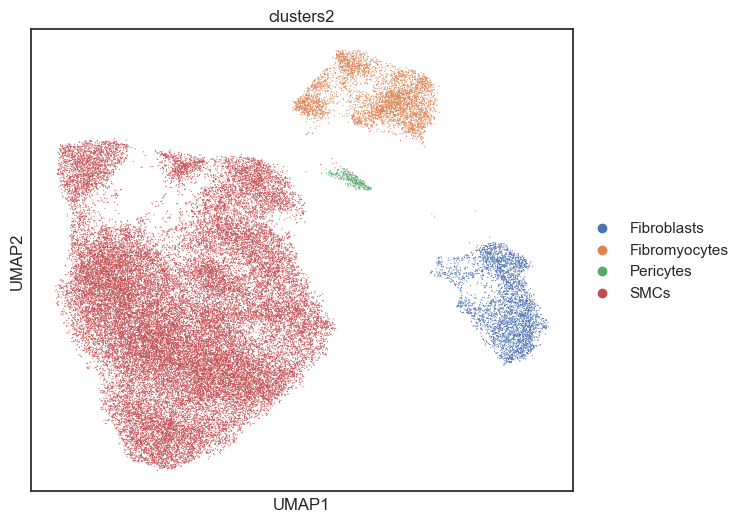

In [54]:
with rc_context({'figure.figsize': (7, 6)}):
    sc.pl.umap(ad, color=['clusters2'])

Check if data is normalized:

In [55]:
ad.layers

Layers with keys: 

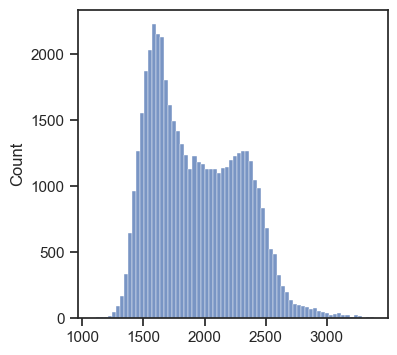

In [56]:
sns.histplot(ad.X.sum(1))
plt.show()

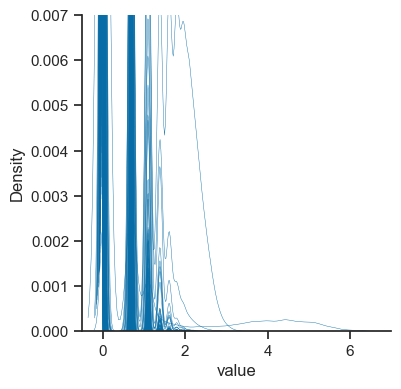

In [57]:
# show expression of 100 random genes (across all spots)
random_genes=random.sample(range(0, ad.X.shape[1]), 100)
adata_sub = ad[:,random_genes]
exp=pd.DataFrame(np.matrix(adata_sub.X))
# plot
pl1=sns.displot(data=pd.melt(exp),x='value',height=4,hue='variable',kind="kde",warn_singular=False,legend=False,palette=list(np.repeat('#086da6',100)), lw=0.3) # genes with 0 expression are excluded
pl1.set(xlim=(-0.5, 7),ylim=(0,0.007));
sns.set_style("ticks")
plt.show()

In [58]:
exp.iloc[0:5,0:30]

0    1         2    3    4    5    6    7    8    9   ...   20   21   22  \
0  0.0  0.0  1.098610  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.693147  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    23   24   25   26   27   28   29  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 30 columns]

Note: Matrix is apparently log-transformed. Also see https://github.com/cnk113/vascular-analysis/issues/1.

In [59]:
# reverse log-transformation ln(x+1)
import math
ad.layers["counts"] = (math.e**(ad.X))-1

In [60]:
ad.layers["log?"] = ad.X

In [61]:
ad.X = ad.layers["counts"]

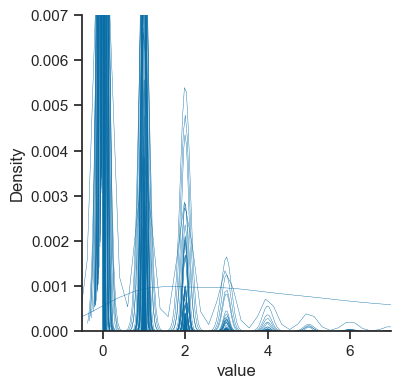

In [62]:
# show expression of 100 random genes (across all spots)
random_genes=random.sample(range(0, ad.X.shape[1]), 100)
adata_sub = ad[:,random_genes]
exp=pd.DataFrame(np.matrix(adata_sub.X))
# plot
pl1=sns.displot(data=pd.melt(exp),x='value',height=4,hue='variable',kind="kde",warn_singular=False,legend=False,palette=list(np.repeat('#086da6',100)), lw=0.3) # genes with 0 expression are excluded
pl1.set(xlim=(-0.5, 7),ylim=(0,0.007));
plt.show()

In [63]:
exp.iloc[0:5,0:20]

0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    15   16   17   18   19  
0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  1.0  0.0  0.0  
3  0.0  0.0  1.0  0.0  0.0  
4  0.0  0.0  1.0  1.0  0.0

C:\Users\sfrerich\AppData\Local\Temp\ipykernel_10044\2170774648.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  pl=sns.histplot(data=pd.melt(exp),x='value',binwidth=0.5,legend=True,palette=list(np.repeat('#086da6',100)));


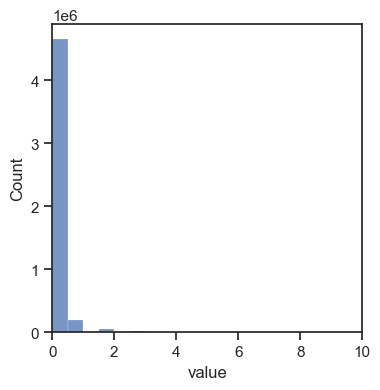

In [64]:
pl=sns.histplot(data=pd.melt(exp),x='value',binwidth=0.5,legend=True,palette=list(np.repeat('#086da6',100)));
pl.set(xlim=(0, 10));
plt.show()

Now normalize and log-transform

In [65]:
ad.layers["counts"] = ad.X.copy() # save unnormalized raw RNA counts - retrieve via ad.X = ad.layers["counts"]

In [66]:
sc.pp.normalize_total(ad, inplace=True) # Normalize each cell by total counts over all genes, so that every cell has the same total count after normalization.

normalizing counts per cell
    finished (0:00:00)


In [67]:
sc.pp.log1p(ad) # X = log(X + 1)

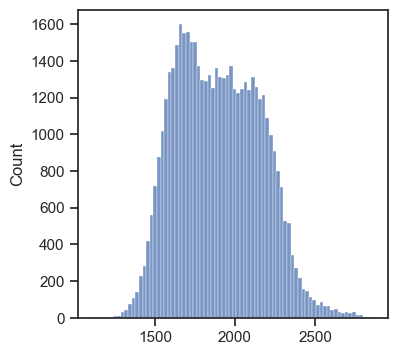

In [68]:
sns.histplot(ad.X.sum(1))
plt.show()

In [69]:
ad.layers["normalized"] = ad.X.copy() # save normalized + log-transformed (but unscaled) counts - retrieve via adata.X = adata.layers["normalized"]

In [70]:
ad

AnnData object with n_obs × n_vars = 49553 × 36138
    obs: 'cellId', 'orig.ident', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'Sample', 'nCount_combined', 'nFeature_combined', 'percent.mt', 'softmax', 'nCount_SCT', 'nFeature_SCT', 'clusters', 'FBMC_score', 'SMC_score', 'FB_score', 'PC_score', 'sub_clusters', 'clusters2'
    uns: 'clusters2_colors', 'log1p'
    obsm: 'X_umap'
    layers: 'counts', 'log?', 'normalized'

In [71]:
ad.layers

Layers with keys: counts, log?, normalized

In [72]:
ad.obs["clusters"] = ad.obs["clusters2"]

In [73]:
winkler_pv = ad

### Merge

In [74]:
# free memory
del winkler_pv.layers["log?"]
del winkler_pv.layers["counts"]
del winkler_ec.layers["counts"]

In [75]:
del winkler_pv.uns
del winkler_ec.uns

In [76]:
del ad
del exp
del adata_sub
del random_genes

In [77]:
# merge winkler datasets
# ignore potential batch effects because dataset is pre-annotated
adata = anndata.concat([winkler_ec, winkler_pv], join="inner") 

D:\Programme\Anaconda\envs\scanpy\Lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
D:\Programme\Anaconda\envs\scanpy\Lib\site-packages\anndata\_core\anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


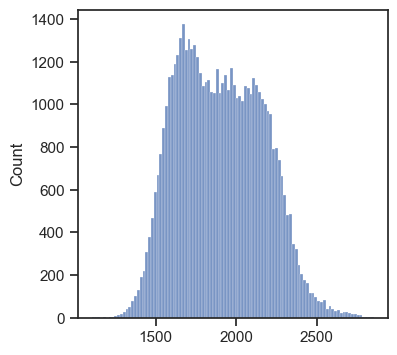

In [78]:
sns.histplot(adata.X.sum(1), bins = 100)
plt.show()

# Standard pipeline

Skip, because data is pre-analyzed.

# Vascular marker genes

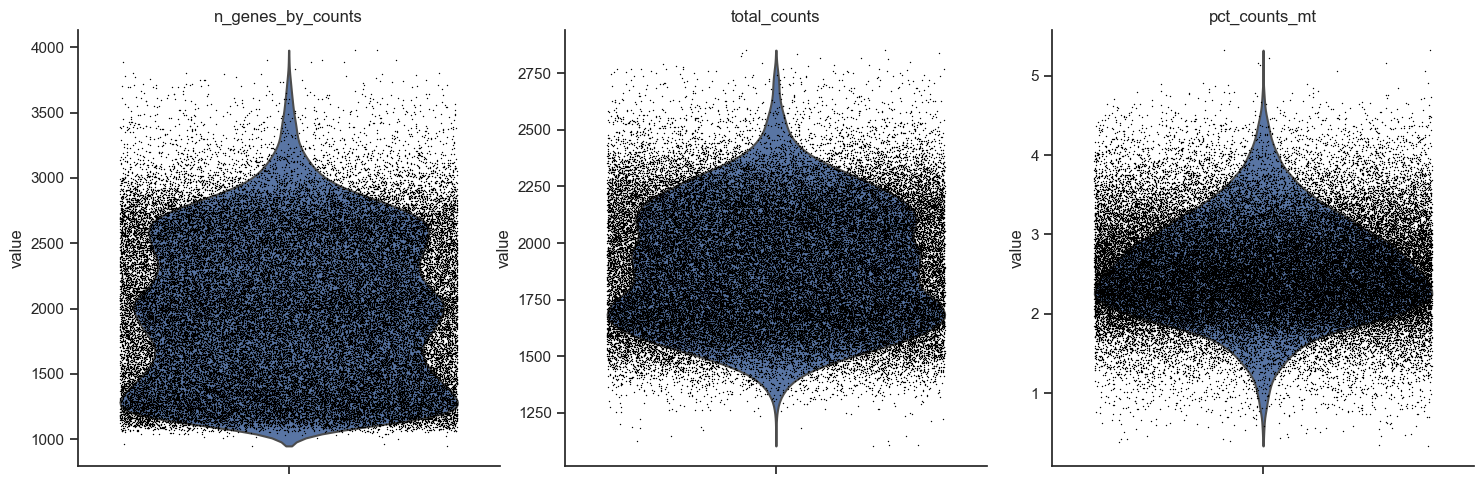

In [79]:
# Basic QC metrics
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],jitter=0.4, multi_panel=True)

In [ ]:
sc.tl.rank_genes_groups(adata, 'clusters', method='wilcoxon')

In [ ]:
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)

Export DEG table

In [ ]:
import sys
sys.path.append(main_dir+"/Git/p06/p06-visium/visium-foxf2")
from p6_helper_functions import rank_genes_groups_df

In [108]:
# export DEG table
celltypes = adata.obs.clusters.unique().tolist()
merged_df = pd.DataFrame()
for group in celltypes:
    rank_df = rank_genes_groups_df(adata=adata, group=group, adj_pval_cutoff=None, log2fc_cutoff=None, sortby='zscore')
    merged_df = pd.concat([merged_df, rank_df])
    merged_df['reference'] = 'all other clusters'
merged_df.head(3)

divide by zero encountered in log10
divide by zero encountered in log10
divide by zero encountered in log10
divide by zero encountered in log10


gene    log2FC          FC  pvals  pvals_adj  \
CLDN5            CLDN5  7.728694  212.113770    0.0        0.0   
ST6GALNAC3  ST6GALNAC3  7.110999  138.236908    0.0        0.0   
MECOM            MECOM  4.788053   27.627882    0.0        0.0   

            nlog10_pval_adj      zscore group           reference  
CLDN5                   inf  115.524727   ECs  all other clusters  
ST6GALNAC3              inf  112.986092   ECs  all other clusters  
MECOM                   inf  110.516487   ECs  all other clusters

In [109]:
merged_df.group.unique().tolist()

['ECs', 'Fibromyocytes', 'SMCs', 'Fibroblasts', 'Pericytes']

In [110]:
# export as csv
merged_df.to_csv(main_dir+'/P6_Foxf2_per_celltype/DEA/'+ date.today().strftime("%Y%m%d")+'_DE_genes_Winkler2022.csv',sep=';')

# Focus on: Foxf2

In [81]:
gene="FOXF2"

## Plot

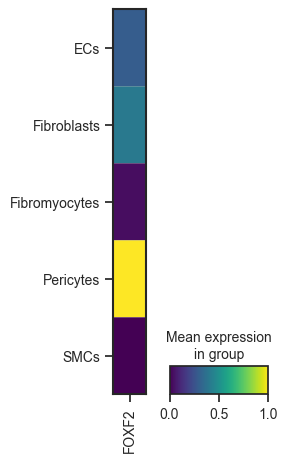

In [82]:
sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

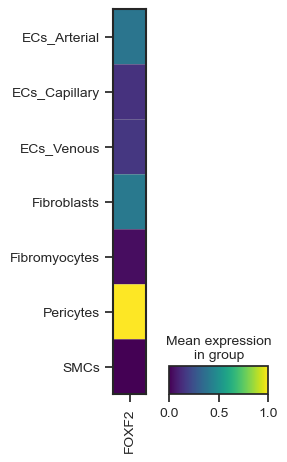

In [84]:
sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

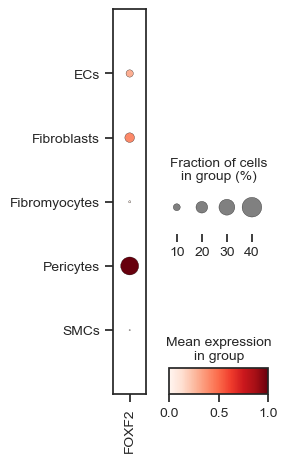

In [86]:
sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

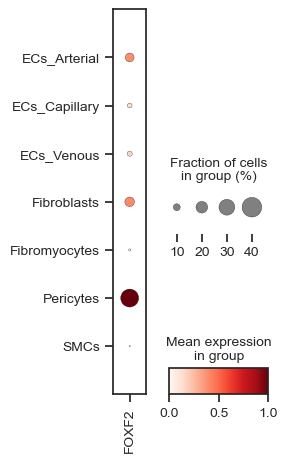

In [87]:
sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

## Excl zonation

In [84]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']
ex

mean_expression
clusters                      
ECs                   0.291276
Fibroblasts           0.403376
Fibromyocytes         0.033961
Pericytes             1.000000
SMCs                  0.000000

In [85]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']
fc

fraction_of_cells
clusters                        
ECs                     0.107273
Fibroblasts             0.153991
Fibromyocytes           0.021365
Pericytes               0.355623
SMCs                    0.010474

In [90]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Winkler2022"
foxf2['organism'] = "Human"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters"].value_counts()).reindex(foxf2.index)
foxf2

mean_expression  fraction_of_cells   gene       source  \
clusters                                                                
ECs                   0.291276           0.107273  FOXF2  Winkler2022   
Fibroblasts           0.403376           0.153991  FOXF2  Winkler2022   
Fibromyocytes         0.033961           0.021365  FOXF2  Winkler2022   
Pericytes             1.000000           0.355623  FOXF2  Winkler2022   
SMCs                  0.000000           0.010474  FOXF2  Winkler2022   

              organism  cell_number  
clusters                             
ECs              Human         4950  
Fibroblasts      Human         3721  
Fibromyocytes    Human         4353  
Pericytes        Human          329  
SMCs             Human        41150

In [91]:
# export
name='Winkler2022'

In [92]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Foxf2_summarized\\'+ date.today().strftime("%Y%m%d")+'_'+name+'_normalized.csv',sep=';')

## Incl zonation

In [93]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True).values_df
ex.columns = ['mean_expression']

In [94]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True).dot_size_df
fc.columns = ['fraction_of_cells']

In [96]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Winkler2022"
foxf2['organism'] = "Human"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters2"].value_counts()).reindex(foxf2.index)
foxf2

mean_expression  fraction_of_cells   gene       source  \
clusters2                                                               
ECs_Arterial          0.388578           0.136868  FOXF2  Winkler2022   
ECs_Capillary         0.143142           0.060606  FOXF2  Winkler2022   
ECs_Venous            0.156274           0.066351  FOXF2  Winkler2022   
Fibroblasts           0.403376           0.153991  FOXF2  Winkler2022   
Fibromyocytes         0.033961           0.021365  FOXF2  Winkler2022   
Pericytes             1.000000           0.355623  FOXF2  Winkler2022   
SMCs                  0.000000           0.010474  FOXF2  Winkler2022   

              organism  cell_number  
clusters2                            
ECs_Arterial     Human         2886  
ECs_Capillary    Human          165  
ECs_Venous       Human         1899  
Fibroblasts      Human         3721  
Fibromyocytes    Human         4353  
Pericytes        Human          329  
SMCs             Human        41150

In [97]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Foxf2_summarized\\incl_zonation\\'+ date.today().strftime("%Y%m%d")+'_'+name+'_incl_zonation_normalized.csv',sep=';')

# Focus on: Other genes

## Foxo1

In [98]:
gene="FOXO1"

### Plot

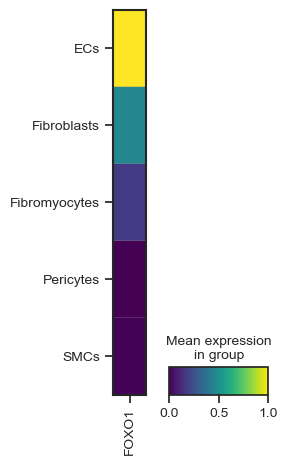

In [100]:
sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

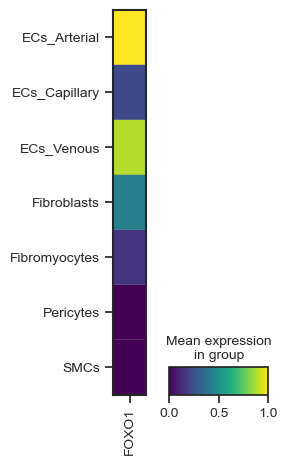

In [101]:
sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

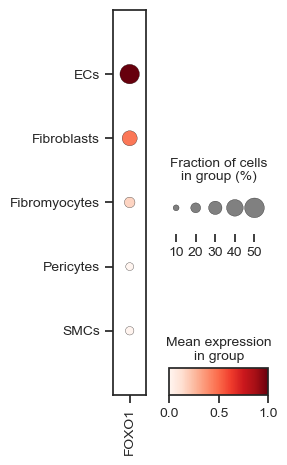

In [102]:
sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

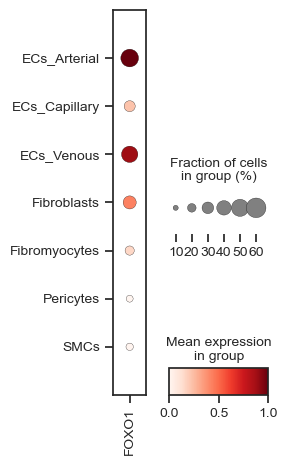

In [103]:
sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

### Excl zonation

In [104]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']
ex

mean_expression
clusters                      
ECs                   1.000000
Fibroblasts           0.460878
Fibromyocytes         0.164828
Pericytes             0.000000
SMCs                  0.007659

In [105]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']
fc

fraction_of_cells
clusters                        
ECs                     0.494949
Fibroblasts             0.349368
Fibromyocytes           0.218929
Pericytes               0.148936
SMCs                    0.163183

In [106]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Winkler2022"
foxf2['organism'] = "Human"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters"].value_counts()).reindex(foxf2.index)
foxf2

mean_expression  fraction_of_cells   gene       source  \
clusters                                                                
ECs                   1.000000           0.494949  FOXO1  Winkler2022   
Fibroblasts           0.460878           0.349368  FOXO1  Winkler2022   
Fibromyocytes         0.164828           0.218929  FOXO1  Winkler2022   
Pericytes             0.000000           0.148936  FOXO1  Winkler2022   
SMCs                  0.007659           0.163183  FOXO1  Winkler2022   

              organism  cell_number  
clusters                             
ECs              Human         4950  
Fibroblasts      Human         3721  
Fibromyocytes    Human         4353  
Pericytes        Human          329  
SMCs             Human        41150

In [99]:
# export
name='Winkler2022'

In [107]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_normalized.csv',sep=';')

### Incl zonation

In [108]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']

In [109]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']

In [110]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Winkler2022"
foxf2['organism'] = "Human"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters2"].value_counts()).reindex(foxf2.index)
foxf2

mean_expression  fraction_of_cells   gene       source  \
clusters2                                                               
ECs_Arterial          1.000000           0.523216  FOXO1  Winkler2022   
ECs_Capillary         0.225253           0.278788  FOXO1  Winkler2022   
ECs_Venous            0.883314           0.470774  FOXO1  Winkler2022   
Fibroblasts           0.428345           0.349368  FOXO1  Winkler2022   
Fibromyocytes         0.153193           0.218929  FOXO1  Winkler2022   
Pericytes             0.000000           0.148936  FOXO1  Winkler2022   
SMCs                  0.007118           0.163183  FOXO1  Winkler2022   

              organism  cell_number  
clusters2                            
ECs_Arterial     Human         2886  
ECs_Capillary    Human          165  
ECs_Venous       Human         1899  
Fibroblasts      Human         3721  
Fibromyocytes    Human         4353  
Pericytes        Human          329  
SMCs             Human        41150

In [111]:
# export
name='Winkler2022'

In [112]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_incl_zonation_normalized.csv',sep=';')

## Tek = Tie2

In [113]:
gene="TEK"

### Plot

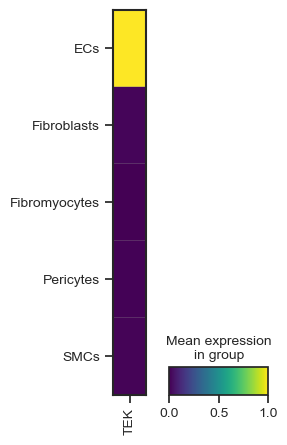

In [114]:
sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

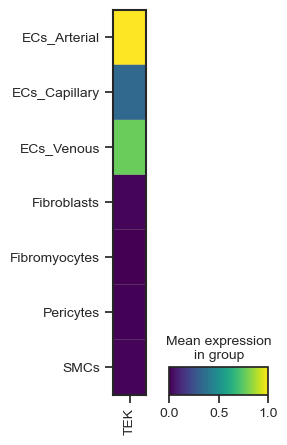

In [115]:
sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

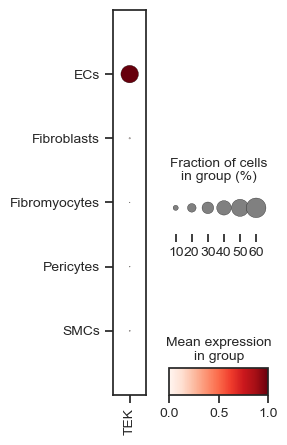

In [116]:
sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

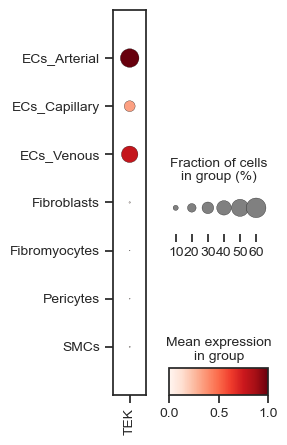

In [117]:
sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

### Excl zonation

In [118]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']
ex

mean_expression
clusters                      
ECs                   1.000000
Fibroblasts           0.014975
Fibromyocytes         0.000000
Pericytes             0.007327
SMCs                  0.008887

In [119]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']
fc

fraction_of_cells
clusters                        
ECs                     0.516566
Fibroblasts             0.018006
Fibromyocytes           0.006892
Pericytes               0.009119
SMCs                    0.013730

In [120]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Winkler2022"
foxf2['organism'] = "Human"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters"].value_counts()).reindex(foxf2.index)
foxf2

mean_expression  fraction_of_cells gene       source organism  \
clusters                                                                       
ECs                   1.000000           0.516566  TEK  Winkler2022    Human   
Fibroblasts           0.014975           0.018006  TEK  Winkler2022    Human   
Fibromyocytes         0.000000           0.006892  TEK  Winkler2022    Human   
Pericytes             0.007327           0.009119  TEK  Winkler2022    Human   
SMCs                  0.008887           0.013730  TEK  Winkler2022    Human   

               cell_number  
clusters                    
ECs                   4950  
Fibroblasts           3721  
Fibromyocytes         4353  
Pericytes              329  
SMCs                 41150

In [121]:
# export
name='Winkler2022'

In [122]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_normalized.csv',sep=';')

### Incl zonation

In [123]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']

In [124]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']

In [125]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Winkler2022"
foxf2['organism'] = "Human"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters2"].value_counts()).reindex(foxf2.index)
foxf2

mean_expression  fraction_of_cells gene       source organism  \
clusters2                                                                      
ECs_Arterial          1.000000           0.557519  TEK  Winkler2022    Human   
ECs_Capillary         0.335242           0.272727  TEK  Winkler2022    Human   
ECs_Venous            0.771136           0.475513  TEK  Winkler2022    Human   
Fibroblasts           0.013328           0.018006  TEK  Winkler2022    Human   
Fibromyocytes         0.000000           0.006892  TEK  Winkler2022    Human   
Pericytes             0.006521           0.009119  TEK  Winkler2022    Human   
SMCs                  0.007910           0.013730  TEK  Winkler2022    Human   

               cell_number  
clusters2                   
ECs_Arterial          2886  
ECs_Capillary          165  
ECs_Venous            1899  
Fibroblasts           3721  
Fibromyocytes         4353  
Pericytes              329  
SMCs                 41150

In [126]:
# export
name='Winkler2022'

In [127]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_incl_zonation_normalized.csv',sep=';')

## Nos3 = eNOS

In [128]:
gene="NOS3"

### Plot

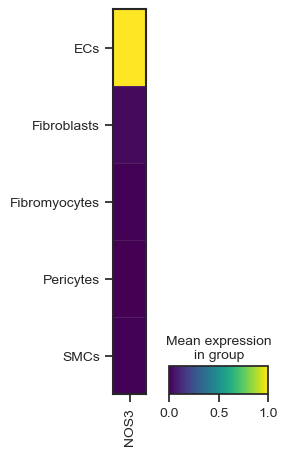

In [129]:
sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

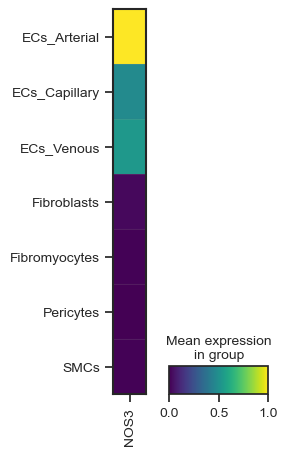

In [130]:
sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

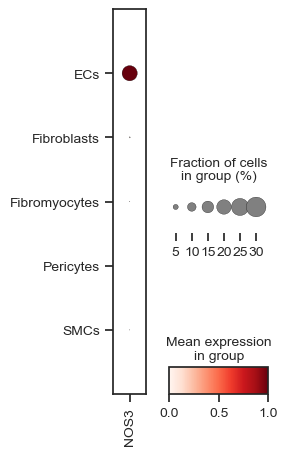

In [131]:
sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

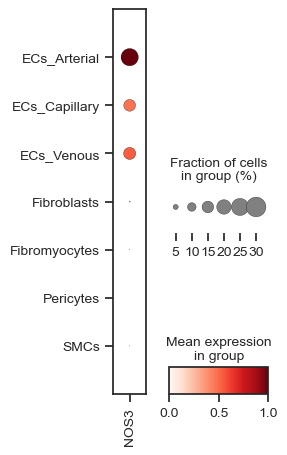

In [132]:
sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

### Excl zonation

In [133]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']
ex

mean_expression
clusters                      
ECs                   1.000000
Fibroblasts           0.026624
Fibromyocytes         0.007735
Pericytes             0.000000
SMCs                  0.006522

In [134]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']
fc

fraction_of_cells
clusters                        
ECs                     0.213131
Fibroblasts             0.006181
Fibromyocytes           0.001838
Pericytes               0.000000
SMCs                    0.001555

In [135]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Winkler2022"
foxf2['organism'] = "Human"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters"].value_counts()).reindex(foxf2.index)
foxf2

mean_expression  fraction_of_cells  gene       source organism  \
clusters                                                                        
ECs                   1.000000           0.213131  NOS3  Winkler2022    Human   
Fibroblasts           0.026624           0.006181  NOS3  Winkler2022    Human   
Fibromyocytes         0.007735           0.001838  NOS3  Winkler2022    Human   
Pericytes             0.000000           0.000000  NOS3  Winkler2022    Human   
SMCs                  0.006522           0.001555  NOS3  Winkler2022    Human   

               cell_number  
clusters                    
ECs                   4950  
Fibroblasts           3721  
Fibromyocytes         4353  
Pericytes              329  
SMCs                 41150

In [136]:
# export
name='Winkler2022'

In [137]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_normalized.csv',sep=';')

### Incl zonation

In [138]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']

In [139]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']

In [140]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Winkler2022"
foxf2['organism'] = "Human"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters2"].value_counts()).reindex(foxf2.index)
foxf2

mean_expression  fraction_of_cells  gene       source organism  \
clusters2                                                                       
ECs_Arterial          1.000000           0.253292  NOS3  Winkler2022    Human   
ECs_Capillary         0.475248           0.151515  NOS3  Winkler2022    Human   
ECs_Venous            0.533908           0.157451  NOS3  Winkler2022    Human   
Fibroblasts           0.021398           0.006181  NOS3  Winkler2022    Human   
Fibromyocytes         0.006217           0.001838  NOS3  Winkler2022    Human   
Pericytes             0.000000           0.000000  NOS3  Winkler2022    Human   
SMCs                  0.005242           0.001555  NOS3  Winkler2022    Human   

               cell_number  
clusters2                   
ECs_Arterial          2886  
ECs_Capillary          165  
ECs_Venous            1899  
Fibroblasts           3721  
Fibromyocytes         4353  
Pericytes              329  
SMCs                 41150

In [141]:
# export
name='Winkler2022'

In [142]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_incl_zonation_normalized.csv',sep=';')

## HTRA1

In [113]:
gene="HTRA1"

### Plot

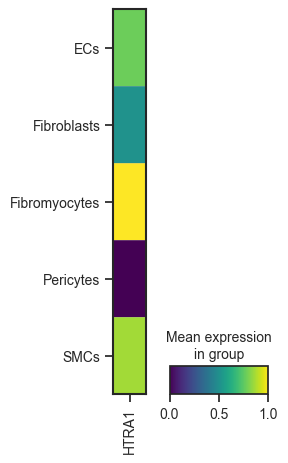

In [114]:
sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

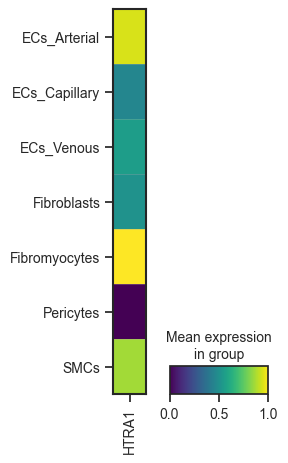

In [115]:
sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


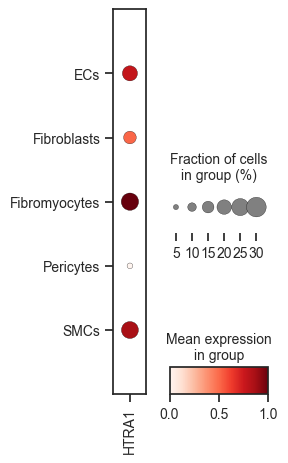

In [116]:
sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


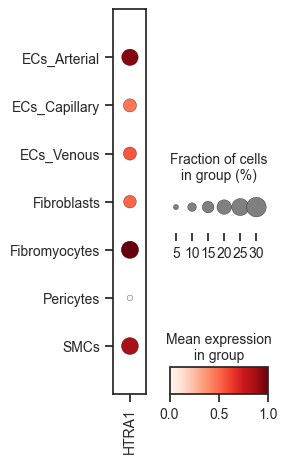

In [117]:
sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

### Excl zonation

In [118]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']
ex

mean_expression
clusters                      
ECs                   0.774885
Fibroblasts           0.508351
Fibromyocytes         1.000000
Pericytes             0.000000
SMCs                  0.861332

In [119]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']
fc

fraction_of_cells
clusters                        
ECs                     0.211515
Fibroblasts             0.167428
Fibromyocytes           0.254537
Pericytes               0.057751
SMCs                    0.247582

In [120]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Winkler2022"
foxf2['organism'] = "Human"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters"].value_counts()).reindex(foxf2.index)
foxf2

mean_expression  fraction_of_cells   gene       source  \
clusters                                                                
ECs                   0.774885           0.211515  HTRA1  Winkler2022   
Fibroblasts           0.508351           0.167428  HTRA1  Winkler2022   
Fibromyocytes         1.000000           0.254537  HTRA1  Winkler2022   
Pericytes             0.000000           0.057751  HTRA1  Winkler2022   
SMCs                  0.861332           0.247582  HTRA1  Winkler2022   

              organism  cell_number  
clusters                             
ECs              Human         4950  
Fibroblasts      Human         3721  
Fibromyocytes    Human         4353  
Pericytes        Human          329  
SMCs             Human        41150

In [121]:
# export
name='Winkler2022'

In [122]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_normalized.csv',sep=';')

### Incl zonation

In [123]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']

In [124]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']

In [125]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Winkler2022"
foxf2['organism'] = "Human"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters2"].value_counts()).reindex(foxf2.index)
foxf2

mean_expression  fraction_of_cells   gene       source  \
clusters2                                                               
ECs_Arterial          0.938232           0.237699  HTRA1  Winkler2022   
ECs_Capillary         0.457648           0.175758  HTRA1  Winkler2022   
ECs_Venous            0.554204           0.174829  HTRA1  Winkler2022   
Fibroblasts           0.508351           0.167428  HTRA1  Winkler2022   
Fibromyocytes         1.000000           0.254537  HTRA1  Winkler2022   
Pericytes             0.000000           0.057751  HTRA1  Winkler2022   
SMCs                  0.861332           0.247582  HTRA1  Winkler2022   

              organism  cell_number  
clusters2                            
ECs_Arterial     Human         2886  
ECs_Capillary    Human          165  
ECs_Venous       Human         1899  
Fibroblasts      Human         3721  
Fibromyocytes    Human         4353  
Pericytes        Human          329  
SMCs             Human        41150

In [126]:
# export
name='Winkler2022'

In [127]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_incl_zonation_normalized.csv',sep=';')

## EGFL8

In [128]:
gene="EGFL8"

### Plot

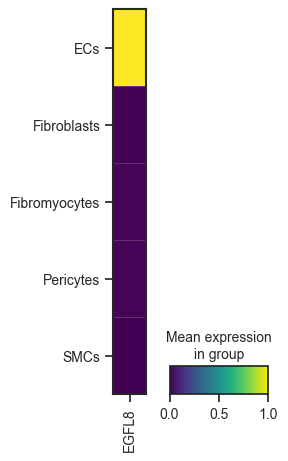

In [129]:
sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

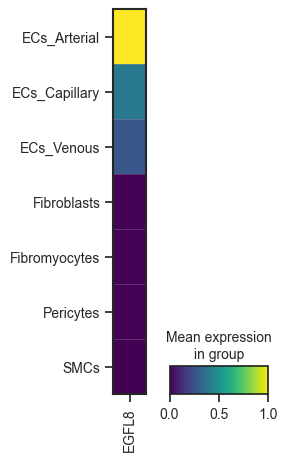

In [130]:
sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


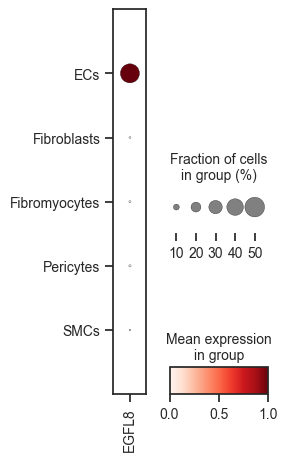

In [131]:
sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored


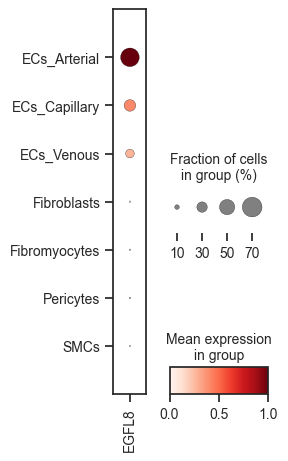

In [132]:
sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

### Excl zonation

In [133]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']
ex

mean_expression
clusters                      
ECs                   1.000000
Fibroblasts           0.005712
Fibromyocytes         0.008027
Pericytes             0.010046
SMCs                  0.000000

In [134]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']
fc

fraction_of_cells
clusters                        
ECs                     0.481414
Fibroblasts             0.023650
Fibromyocytes           0.025270
Pericytes               0.027356
SMCs                    0.020826

In [135]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Winkler2022"
foxf2['organism'] = "Human"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters"].value_counts()).reindex(foxf2.index)
foxf2

mean_expression  fraction_of_cells   gene       source  \
clusters                                                                
ECs                   1.000000           0.481414  EGFL8  Winkler2022   
Fibroblasts           0.005712           0.023650  EGFL8  Winkler2022   
Fibromyocytes         0.008027           0.025270  EGFL8  Winkler2022   
Pericytes             0.010046           0.027356  EGFL8  Winkler2022   
SMCs                  0.000000           0.020826  EGFL8  Winkler2022   

              organism  cell_number  
clusters                             
ECs              Human         4950  
Fibroblasts      Human         3721  
Fibromyocytes    Human         4353  
Pericytes        Human          329  
SMCs             Human        41150

In [136]:
# export
name='Winkler2022'

In [137]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_normalized.csv',sep=';')

### Incl zonation

In [138]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']

In [139]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']

In [140]:
foxf2 = pd.concat([ex, fc], axis=1)
foxf2['gene'] = gene
foxf2['source'] = "Winkler2022"
foxf2['organism'] = "Human"
foxf2['cell_number'] = pd.DataFrame(adata.obs["clusters2"].value_counts()).reindex(foxf2.index)
foxf2

mean_expression  fraction_of_cells   gene       source  \
clusters2                                                               
ECs_Arterial          1.000000           0.650728  EGFL8  Winkler2022   
ECs_Capillary         0.405907           0.345455  EGFL8  Winkler2022   
ECs_Venous            0.269885           0.235914  EGFL8  Winkler2022   
Fibroblasts           0.003999           0.023650  EGFL8  Winkler2022   
Fibromyocytes         0.005620           0.025270  EGFL8  Winkler2022   
Pericytes             0.007033           0.027356  EGFL8  Winkler2022   
SMCs                  0.000000           0.020826  EGFL8  Winkler2022   

              organism  cell_number  
clusters2                            
ECs_Arterial     Human         2886  
ECs_Capillary    Human          165  
ECs_Venous       Human         1899  
Fibroblasts      Human         3721  
Fibromyocytes    Human         4353  
Pericytes        Human          329  
SMCs             Human        41150

In [141]:
# export
name='Winkler2022'

In [142]:
# Win
foxf2.to_csv(main_dir+'\\P6_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_incl_zonation_normalized.csv',sep=';')

## Flt1

In [89]:
gene="FLT1"

### Plot

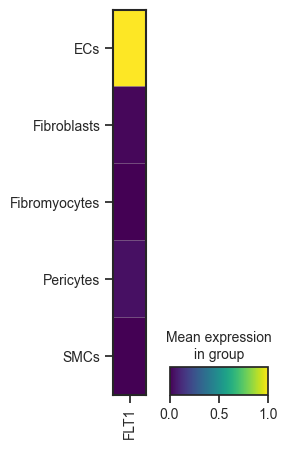

In [90]:
sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

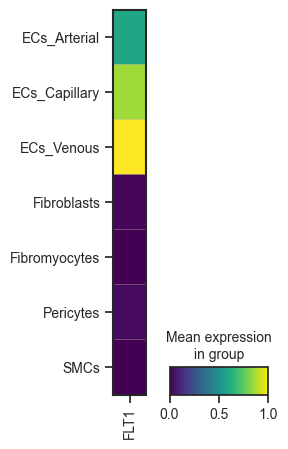

In [91]:
sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

/Users/simonf/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


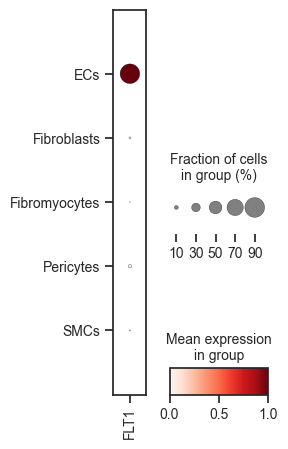

In [92]:
sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

/Users/simonf/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


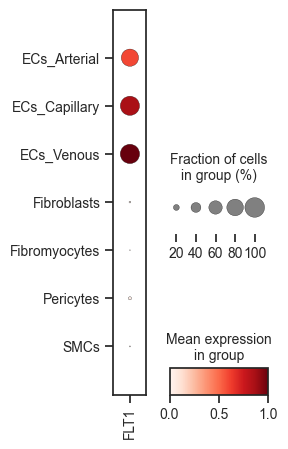

In [93]:
sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

### Excl zonation

In [94]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']
ex

mean_expression
clusters                      
ECs                   1.000000
Fibroblasts           0.015991
Fibromyocytes         0.000000
Pericytes             0.039471
SMCs                  0.002452

In [95]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']
fc

fraction_of_cells
clusters                        
ECs                     0.899596
Fibroblasts             0.042193
Fibromyocytes           0.013324
Pericytes               0.088146
SMCs                    0.020583

In [98]:
othergene = pd.concat([ex, fc], axis=1)
othergene['gene'] = gene
othergene['source'] = "Winkler2022"
othergene['organism'] = "Human"
othergene['cell_number'] = pd.DataFrame(adata.obs["clusters"].value_counts()).reindex(othergene.index)
othergene

mean_expression  fraction_of_cells  gene       source organism  \
clusters                                                                        
ECs                   1.000000           0.899596  FLT1  Winkler2022    Human   
Fibroblasts           0.015991           0.042193  FLT1  Winkler2022    Human   
Fibromyocytes         0.000000           0.013324  FLT1  Winkler2022    Human   
Pericytes             0.039471           0.088146  FLT1  Winkler2022    Human   
SMCs                  0.002452           0.020583  FLT1  Winkler2022    Human   

               cell_number  
clusters                    
ECs                   4950  
Fibroblasts           3721  
Fibromyocytes         4353  
Pericytes              329  
SMCs                 41150

In [99]:
# export
name='Winkler2022'

In [100]:
# Win
othergene.to_csv(main_dir+'\\P06_Foxf2_per_celltype\\Other_genes_summarized\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_normalized.csv',sep=';')

### Incl zonation

In [101]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']

In [102]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']

In [104]:
othergene = pd.concat([ex, fc], axis=1)
othergene['gene'] = gene
othergene['source'] = "Winkler2022"
othergene['organism'] = "Human"
othergene['cell_number'] = pd.DataFrame(adata.obs["clusters2"].value_counts()).reindex(othergene.index)
othergene

mean_expression  fraction_of_cells  gene       source organism  \
clusters2                                                                       
ECs_Arterial          0.590264           0.843728  FLT1  Winkler2022    Human   
ECs_Capillary         0.858268           0.969697  FLT1  Winkler2022    Human   
ECs_Venous            1.000000           0.978410  FLT1  Winkler2022    Human   
Fibroblasts           0.012095           0.042193  FLT1  Winkler2022    Human   
Fibromyocytes         0.000000           0.013324  FLT1  Winkler2022    Human   
Pericytes             0.029855           0.088146  FLT1  Winkler2022    Human   
SMCs                  0.001854           0.020583  FLT1  Winkler2022    Human   

               cell_number  
clusters2                   
ECs_Arterial          2886  
ECs_Capillary          165  
ECs_Venous            1899  
Fibroblasts           3721  
Fibromyocytes         4353  
Pericytes              329  
SMCs                 41150

In [105]:
# export
name='Winkler2022'

In [106]:
# Win
othergene.to_csv(main_dir+'\\P06_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_incl_zonation_normalized.csv',sep=';')

## KDR

In [107]:
gene="KDR"

### Plot

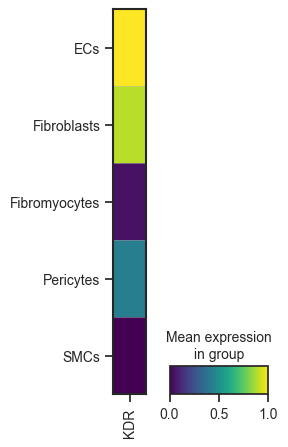

In [108]:
sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

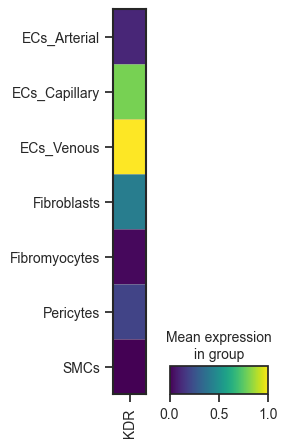

In [109]:
sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

/Users/simonf/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


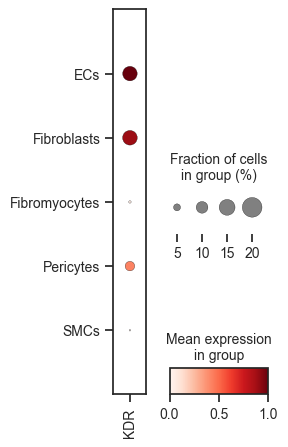

In [110]:
sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

/Users/simonf/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


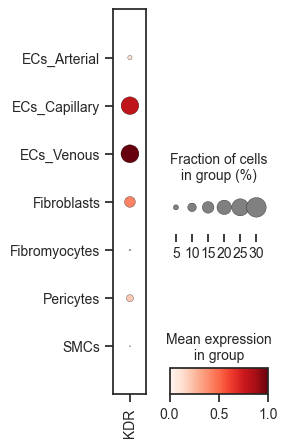

In [111]:
sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

### Excl zonation

In [112]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']
ex

mean_expression
clusters                      
ECs                   1.000000
Fibroblasts           0.891036
Fibromyocytes         0.043172
Pericytes             0.424977
SMCs                  0.000000

In [113]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']
fc

fraction_of_cells
clusters                        
ECs                     0.133333
Fibroblasts             0.135179
Fibromyocytes           0.012405
Pericytes               0.075988
SMCs                    0.006659

In [114]:
othergene = pd.concat([ex, fc], axis=1)
othergene['gene'] = gene
othergene['source'] = "Winkler2022"
othergene['organism'] = "Human"
othergene['cell_number'] = pd.DataFrame(adata.obs["clusters"].value_counts()).reindex(othergene.index)
othergene

mean_expression  fraction_of_cells gene       source organism  \
clusters                                                                       
ECs                   1.000000           0.133333  KDR  Winkler2022    Human   
Fibroblasts           0.891036           0.135179  KDR  Winkler2022    Human   
Fibromyocytes         0.043172           0.012405  KDR  Winkler2022    Human   
Pericytes             0.424977           0.075988  KDR  Winkler2022    Human   
SMCs                  0.000000           0.006659  KDR  Winkler2022    Human   

               cell_number  
clusters                    
ECs                   4950  
Fibroblasts           3721  
Fibromyocytes         4353  
Pericytes              329  
SMCs                 41150

In [115]:
# export
name='Winkler2022'

In [116]:
# Win
othergene.to_csv(main_dir+'\\P06_Foxf2_per_celltype\\Other_genes_summarized\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_normalized.csv',sep=';')

### Incl zonation

In [117]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']

In [118]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']

In [119]:
othergene = pd.concat([ex, fc], axis=1)
othergene['gene'] = gene
othergene['source'] = "Winkler2022"
othergene['organism'] = "Human"
othergene['cell_number'] = pd.DataFrame(adata.obs["clusters2"].value_counts()).reindex(othergene.index)
othergene

mean_expression  fraction_of_cells gene       source organism  \
clusters2                                                                      
ECs_Arterial          0.107728           0.038808  KDR  Winkler2022    Human   
ECs_Capillary         0.793267           0.260606  KDR  Winkler2022    Human   
ECs_Venous            1.000000           0.265929  KDR  Winkler2022    Human   
Fibroblasts           0.421359           0.135179  KDR  Winkler2022    Human   
Fibromyocytes         0.020415           0.012405  KDR  Winkler2022    Human   
Pericytes             0.200966           0.075988  KDR  Winkler2022    Human   
SMCs                  0.000000           0.006659  KDR  Winkler2022    Human   

               cell_number  
clusters2                   
ECs_Arterial          2886  
ECs_Capillary          165  
ECs_Venous            1899  
Fibroblasts           3721  
Fibromyocytes         4353  
Pericytes              329  
SMCs                 41150

In [120]:
# export
name='Winkler2022'

In [121]:
# Win
othergene.to_csv(main_dir+'\\P06_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_incl_zonation_normalized.csv',sep=';')

## NRP1

In [122]:
gene="NRP1"

### Plot

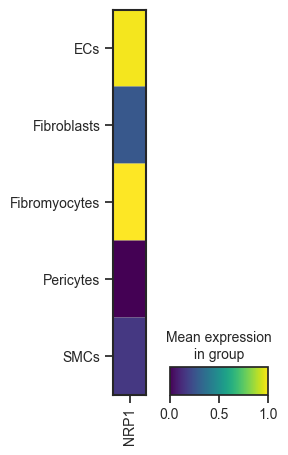

In [123]:
sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

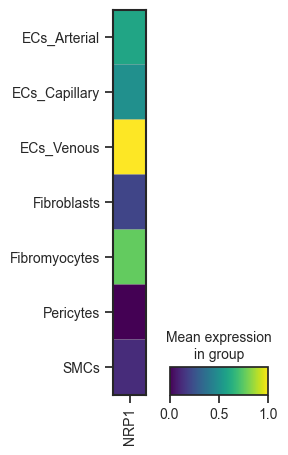

In [124]:
sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

/Users/simonf/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


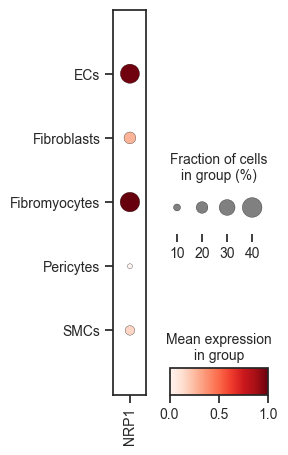

In [125]:
sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

/Users/simonf/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


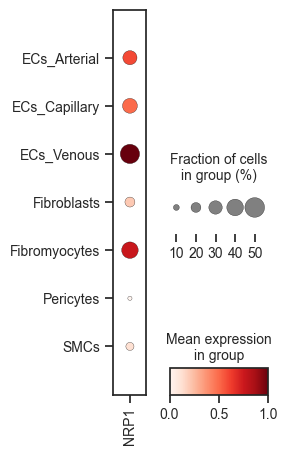

In [126]:
sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

### Excl zonation

In [127]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']
ex

mean_expression
clusters                      
ECs                   0.980746
Fibroblasts           0.269665
Fibromyocytes         1.000000
Pericytes             0.000000
SMCs                  0.162077

In [128]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']
fc

fraction_of_cells
clusters                        
ECs                     0.386667
Fibroblasts             0.202365
Fibromyocytes           0.397197
Pericytes               0.063830
SMCs                    0.153341

In [129]:
othergene = pd.concat([ex, fc], axis=1)
othergene['gene'] = gene
othergene['source'] = "Winkler2022"
othergene['organism'] = "Human"
othergene['cell_number'] = pd.DataFrame(adata.obs["clusters"].value_counts()).reindex(othergene.index)
othergene

mean_expression  fraction_of_cells  gene       source organism  \
clusters                                                                        
ECs                   0.980746           0.386667  NRP1  Winkler2022    Human   
Fibroblasts           0.269665           0.202365  NRP1  Winkler2022    Human   
Fibromyocytes         1.000000           0.397197  NRP1  Winkler2022    Human   
Pericytes             0.000000           0.063830  NRP1  Winkler2022    Human   
SMCs                  0.162077           0.153341  NRP1  Winkler2022    Human   

               cell_number  
clusters                    
ECs                   4950  
Fibroblasts           3721  
Fibromyocytes         4353  
Pericytes              329  
SMCs                 41150

In [130]:
# export
name='Winkler2022'

In [131]:
# Win
othergene.to_csv(main_dir+'\\P06_Foxf2_per_celltype\\Other_genes_summarized\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_normalized.csv',sep=';')

### Incl zonation

In [132]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']

In [133]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']

In [134]:
othergene = pd.concat([ex, fc], axis=1)
othergene['gene'] = gene
othergene['source'] = "Winkler2022"
othergene['organism'] = "Human"
othergene['cell_number'] = pd.DataFrame(adata.obs["clusters2"].value_counts()).reindex(othergene.index)
othergene

mean_expression  fraction_of_cells  gene       source organism  \
clusters2                                                                       
ECs_Arterial          0.589331           0.322592  NRP1  Winkler2022    Human   
ECs_Capillary         0.496511           0.345455  NRP1  Winkler2022    Human   
ECs_Venous            1.000000           0.487625  NRP1  Winkler2022    Human   
Fibroblasts           0.204511           0.202365  NRP1  Winkler2022    Human   
Fibromyocytes         0.758387           0.397197  NRP1  Winkler2022    Human   
Pericytes             0.000000           0.063830  NRP1  Winkler2022    Human   
SMCs                  0.122917           0.153341  NRP1  Winkler2022    Human   

               cell_number  
clusters2                   
ECs_Arterial          2886  
ECs_Capillary          165  
ECs_Venous            1899  
Fibroblasts           3721  
Fibromyocytes         4353  
Pericytes              329  
SMCs                 41150

In [135]:
# export
name='Winkler2022'

In [136]:
# Win
othergene.to_csv(main_dir+'\\P06_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_incl_zonation_normalized.csv',sep=';')

## EFNB2

In [152]:
gene="EFNB2"

### Plot

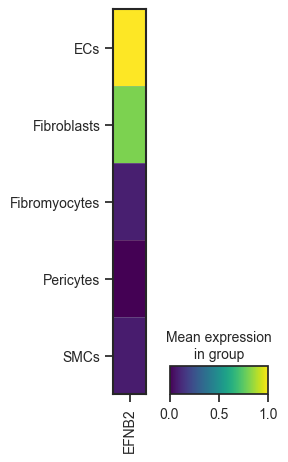

In [153]:
sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

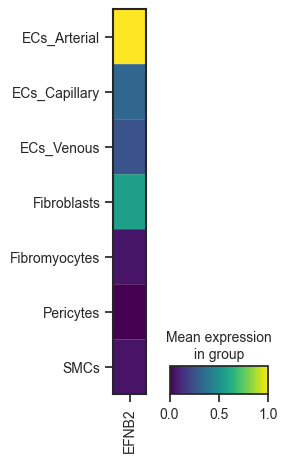

In [154]:
sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

/Users/simonf/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


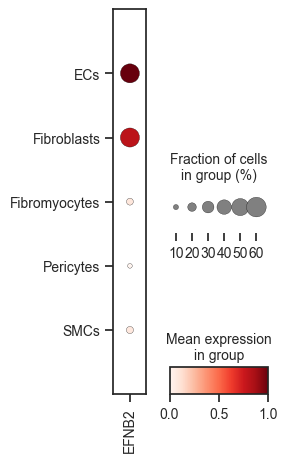

In [155]:
sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

/Users/simonf/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


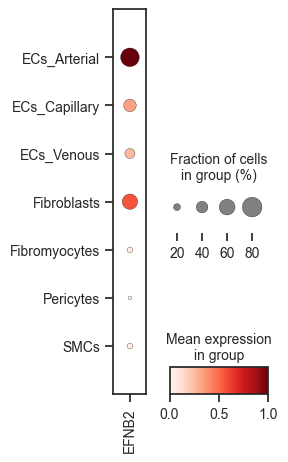

In [156]:
sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

### Excl zonation

In [157]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']
ex

mean_expression
clusters                      
ECs                   1.000000
Fibroblasts           0.801633
Fibromyocytes         0.084217
Pericytes             0.000000
SMCs                  0.076847

In [158]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']
fc

fraction_of_cells
clusters                        
ECs                     0.574747
Fibroblasts             0.578608
Fibromyocytes           0.147255
Pericytes               0.088146
SMCs                    0.154484

In [159]:
othergene = pd.concat([ex, fc], axis=1)
othergene['gene'] = gene
othergene['source'] = "Winkler2022"
othergene['organism'] = "Human"
othergene['cell_number'] = pd.DataFrame(adata.obs["clusters"].value_counts()).reindex(othergene.index)
othergene

mean_expression  fraction_of_cells   gene       source  \
clusters                                                                
ECs                   1.000000           0.574747  EFNB2  Winkler2022   
Fibroblasts           0.801633           0.578608  EFNB2  Winkler2022   
Fibromyocytes         0.084217           0.147255  EFNB2  Winkler2022   
Pericytes             0.000000           0.088146  EFNB2  Winkler2022   
SMCs                  0.076847           0.154484  EFNB2  Winkler2022   

              organism  cell_number  
clusters                             
ECs              Human         4950  
Fibroblasts      Human         3721  
Fibromyocytes    Human         4353  
Pericytes        Human          329  
SMCs             Human        41150

In [160]:
# export
name='Winkler2022'

In [161]:
# Win
othergene.to_csv(main_dir+'\\P06_Foxf2_per_celltype\\Other_genes_summarized\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_normalized.csv',sep=';')

### Incl zonation

In [162]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']

In [163]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']

In [164]:
othergene = pd.concat([ex, fc], axis=1)
othergene['gene'] = gene
othergene['source'] = "Winkler2022"
othergene['organism'] = "Human"
othergene['cell_number'] = pd.DataFrame(adata.obs["clusters2"].value_counts()).reindex(othergene.index)
othergene

mean_expression  fraction_of_cells   gene       source  \
clusters2                                                               
ECs_Arterial          1.000000           0.744629  EFNB2  Winkler2022   
ECs_Capillary         0.331509           0.442424  EFNB2  Winkler2022   
ECs_Venous            0.257626           0.328067  EFNB2  Winkler2022   
Fibroblasts           0.555464           0.578608  EFNB2  Winkler2022   
Fibromyocytes         0.058356           0.147255  EFNB2  Winkler2022   
Pericytes             0.000000           0.088146  EFNB2  Winkler2022   
SMCs                  0.053248           0.154484  EFNB2  Winkler2022   

              organism  cell_number  
clusters2                            
ECs_Arterial     Human         2886  
ECs_Capillary    Human          165  
ECs_Venous       Human         1899  
Fibroblasts      Human         3721  
Fibromyocytes    Human         4353  
Pericytes        Human          329  
SMCs             Human        41150

In [165]:
# export
name='Winkler2022'

In [166]:
# Win
othergene.to_csv(main_dir+'\\P06_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_incl_zonation_normalized.csv',sep=';')

## ITGB1

In [167]:
gene="ITGB1"

### Plot

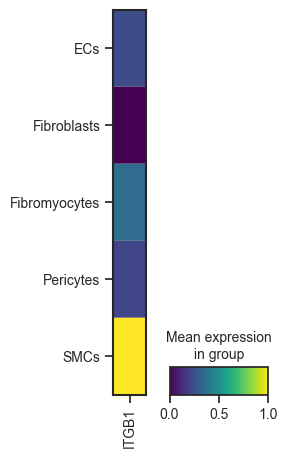

In [168]:
sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

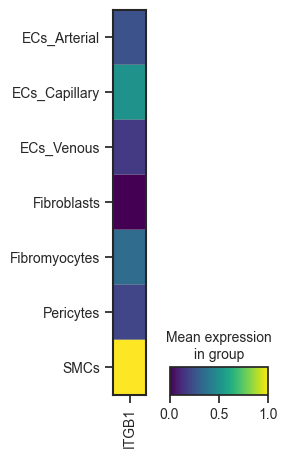

In [169]:
sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

/Users/simonf/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


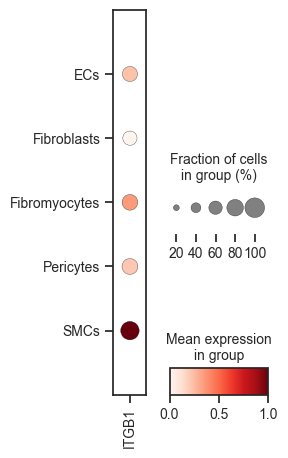

In [170]:
sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

/Users/simonf/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


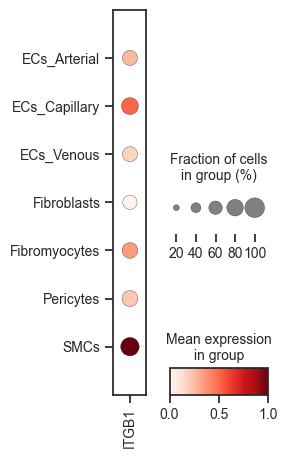

In [171]:
sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

### Excl zonation

In [172]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']
ex

mean_expression
clusters                      
ECs                   0.228159
Fibroblasts           0.000000
Fibromyocytes         0.350858
Pericytes             0.210760
SMCs                  1.000000

In [173]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']
fc

fraction_of_cells
clusters                        
ECs                     0.705051
Fibroblasts             0.649288
Fibromyocytes           0.740868
Pericytes               0.753799
SMCs                    0.920316

In [174]:
othergene = pd.concat([ex, fc], axis=1)
othergene['gene'] = gene
othergene['source'] = "Winkler2022"
othergene['organism'] = "Human"
othergene['cell_number'] = pd.DataFrame(adata.obs["clusters"].value_counts()).reindex(othergene.index)
othergene

mean_expression  fraction_of_cells   gene       source  \
clusters                                                                
ECs                   0.228159           0.705051  ITGB1  Winkler2022   
Fibroblasts           0.000000           0.649288  ITGB1  Winkler2022   
Fibromyocytes         0.350858           0.740868  ITGB1  Winkler2022   
Pericytes             0.210760           0.753799  ITGB1  Winkler2022   
SMCs                  1.000000           0.920316  ITGB1  Winkler2022   

              organism  cell_number  
clusters                             
ECs              Human         4950  
Fibroblasts      Human         3721  
Fibromyocytes    Human         4353  
Pericytes        Human          329  
SMCs             Human        41150

In [175]:
# export
name='Winkler2022'

In [176]:
# Win
othergene.to_csv(main_dir+'\\P06_Foxf2_per_celltype\\Other_genes_summarized\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_normalized.csv',sep=';')

### Incl zonation

In [177]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']

In [178]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']

In [179]:
othergene = pd.concat([ex, fc], axis=1)
othergene['gene'] = gene
othergene['source'] = "Winkler2022"
othergene['organism'] = "Human"
othergene['cell_number'] = pd.DataFrame(adata.obs["clusters2"].value_counts()).reindex(othergene.index)
othergene

mean_expression  fraction_of_cells   gene       source  \
clusters2                                                               
ECs_Arterial          0.250981           0.700277  ITGB1  Winkler2022   
ECs_Capillary         0.510401           0.818182  ITGB1  Winkler2022   
ECs_Venous            0.168952           0.702475  ITGB1  Winkler2022   
Fibroblasts           0.000000           0.649288  ITGB1  Winkler2022   
Fibromyocytes         0.350858           0.740868  ITGB1  Winkler2022   
Pericytes             0.210760           0.753799  ITGB1  Winkler2022   
SMCs                  1.000000           0.920316  ITGB1  Winkler2022   

              organism  cell_number  
clusters2                            
ECs_Arterial     Human         2886  
ECs_Capillary    Human          165  
ECs_Venous       Human         1899  
Fibroblasts      Human         3721  
Fibromyocytes    Human         4353  
Pericytes        Human          329  
SMCs             Human        41150

In [180]:
# export
name='Winkler2022'

In [181]:
# Win
othergene.to_csv(main_dir+'\\P06_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_incl_zonation_normalized.csv',sep=';')

## ANGPT2

In [182]:
gene="ANGPT2"

### Plot

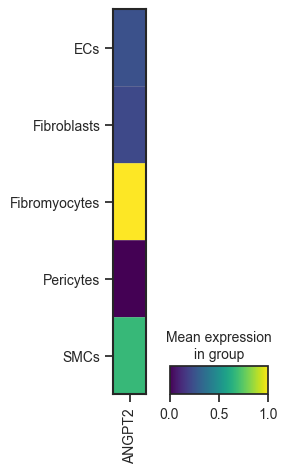

In [183]:
sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

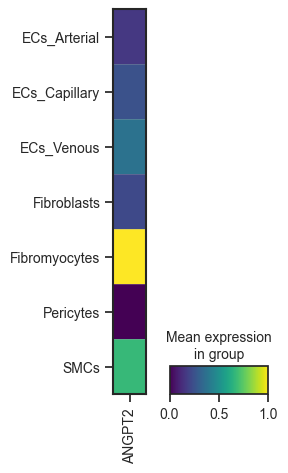

In [184]:
sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

/Users/simonf/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


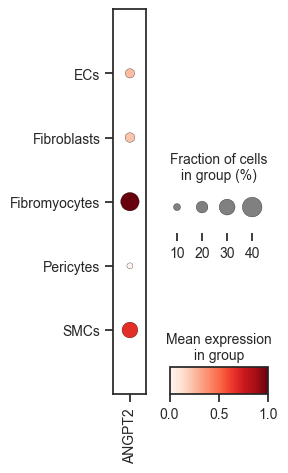

In [185]:
sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

/Users/simonf/miniconda3/envs/scanpy/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


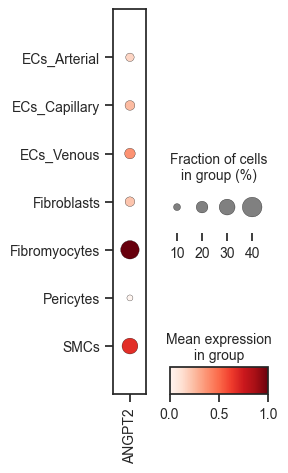

In [186]:
sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

### Excl zonation

In [187]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']
ex

mean_expression
clusters                      
ECs                   0.247313
Fibroblasts           0.219395
Fibromyocytes         1.000000
Pericytes             0.000000
SMCs                  0.669018

In [188]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']
fc

fraction_of_cells
clusters                        
ECs                     0.147879
Fibroblasts             0.154528
Fibromyocytes           0.367792
Pericytes               0.082067
SMCs                    0.300462

In [189]:
othergene = pd.concat([ex, fc], axis=1)
othergene['gene'] = gene
othergene['source'] = "Winkler2022"
othergene['organism'] = "Human"
othergene['cell_number'] = pd.DataFrame(adata.obs["clusters"].value_counts()).reindex(othergene.index)
othergene

mean_expression  fraction_of_cells    gene       source  \
clusters                                                                 
ECs                   0.247313           0.147879  ANGPT2  Winkler2022   
Fibroblasts           0.219395           0.154528  ANGPT2  Winkler2022   
Fibromyocytes         1.000000           0.367792  ANGPT2  Winkler2022   
Pericytes             0.000000           0.082067  ANGPT2  Winkler2022   
SMCs                  0.669018           0.300462  ANGPT2  Winkler2022   

              organism  cell_number  
clusters                             
ECs              Human         4950  
Fibroblasts      Human         3721  
Fibromyocytes    Human         4353  
Pericytes        Human          329  
SMCs             Human        41150

In [190]:
# export
name='Winkler2022'

In [191]:
# Win
othergene.to_csv(main_dir+'\\P06_Foxf2_per_celltype\\Other_genes_summarized\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_normalized.csv',sep=';')

### Incl zonation

In [192]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']

In [193]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']

In [194]:
othergene = pd.concat([ex, fc], axis=1)
othergene['gene'] = gene
othergene['source'] = "Winkler2022"
othergene['organism'] = "Human"
othergene['cell_number'] = pd.DataFrame(adata.obs["clusters2"].value_counts()).reindex(othergene.index)
othergene

mean_expression  fraction_of_cells    gene       source  \
clusters2                                                                
ECs_Arterial          0.161422           0.129245  ANGPT2  Winkler2022   
ECs_Capillary         0.251645           0.157576  ANGPT2  Winkler2022   
ECs_Venous            0.377471           0.175355  ANGPT2  Winkler2022   
Fibroblasts           0.219395           0.154528  ANGPT2  Winkler2022   
Fibromyocytes         1.000000           0.367792  ANGPT2  Winkler2022   
Pericytes             0.000000           0.082067  ANGPT2  Winkler2022   
SMCs                  0.669018           0.300462  ANGPT2  Winkler2022   

              organism  cell_number  
clusters2                            
ECs_Arterial     Human         2886  
ECs_Capillary    Human          165  
ECs_Venous       Human         1899  
Fibroblasts      Human         3721  
Fibromyocytes    Human         4353  
Pericytes        Human          329  
SMCs             Human        41150

In [195]:
# export
name='Winkler2022'

In [196]:
# Win
othergene.to_csv(main_dir+'\\P06_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_incl_zonation_normalized.csv',sep=';')

## CDH5

In [88]:
gene="CDH5"

### Plot

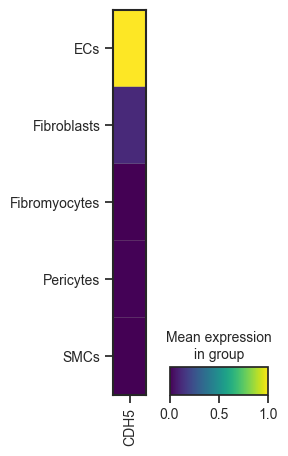

In [89]:
sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

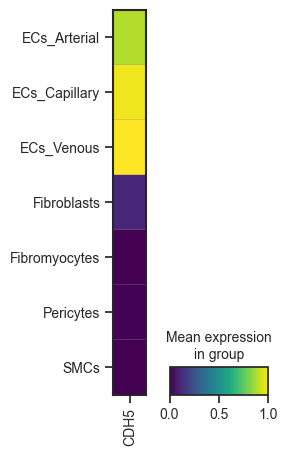

In [90]:
sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

D:\Programme\Anaconda\envs\scanpy\Lib\site-packages\scanpy\plotting\_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


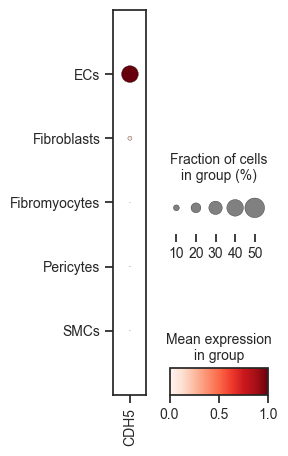

In [91]:
sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

D:\Programme\Anaconda\envs\scanpy\Lib\site-packages\scanpy\plotting\_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


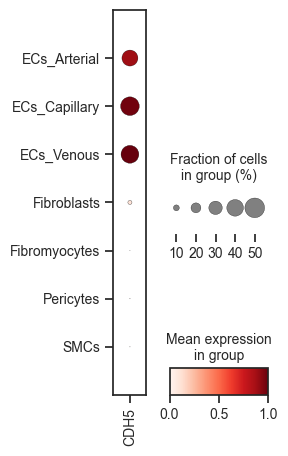

In [92]:
sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", layer="normalized")

### Excl zonation

In [93]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']
ex

mean_expression
clusters                      
ECs                   1.000000
Fibroblasts           0.115726
Fibromyocytes         0.000000
Pericytes             0.004360
SMCs                  0.000914

In [94]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']
fc

fraction_of_cells
clusters                        
ECs                     0.405657
Fibroblasts             0.061543
Fibromyocytes           0.002068
Pericytes               0.003040
SMCs                    0.002625

In [95]:
othergene = pd.concat([ex, fc], axis=1)
othergene['gene'] = gene
othergene['source'] = "Winkler2022"
othergene['organism'] = "Human"
othergene['cell_number'] = pd.DataFrame(adata.obs["clusters"].value_counts()).reindex(othergene.index)
othergene

mean_expression  fraction_of_cells  gene       source organism  \
clusters                                                                        
ECs                   1.000000           0.405657  CDH5  Winkler2022    Human   
Fibroblasts           0.115726           0.061543  CDH5  Winkler2022    Human   
Fibromyocytes         0.000000           0.002068  CDH5  Winkler2022    Human   
Pericytes             0.004360           0.003040  CDH5  Winkler2022    Human   
SMCs                  0.000914           0.002625  CDH5  Winkler2022    Human   

               cell_number  
clusters                    
ECs                   4950  
Fibroblasts           3721  
Fibromyocytes         4353  
Pericytes              329  
SMCs                 41150

In [96]:
# export
name='Winkler2022'

In [97]:
# Win
othergene.to_csv(main_dir+'\\P06_Foxf2_per_celltype\\Other_genes_summarized\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_normalized.csv',sep=';')

### Incl zonation

In [98]:
# mean expression per group (normalized and scaled)
ex = sc.pl.matrixplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,5), standard_scale="var", return_fig=True, layer="normalized").values_df
ex.columns = ['mean_expression']

In [99]:
# dotplot dot size = fraction of cells in group expressing Foxf2
fc = sc.pl.dotplot(adata, [gene], groupby='clusters2', swap_axes=False, figsize=(2,7), standard_scale="var",return_fig=True, layer="normalized").dot_size_df
fc.columns = ['fraction_of_cells']

In [100]:
othergene = pd.concat([ex, fc], axis=1)
othergene['gene'] = gene
othergene['source'] = "Winkler2022"
othergene['organism'] = "Human"
othergene['cell_number'] = pd.DataFrame(adata.obs["clusters2"].value_counts()).reindex(othergene.index)
othergene

mean_expression  fraction_of_cells  gene       source organism  \
clusters2                                                                       
ECs_Arterial          0.883383           0.380111  CDH5  Winkler2022    Human   
ECs_Capillary         0.979144           0.466667  CDH5  Winkler2022    Human   
ECs_Venous            1.000000           0.439179  CDH5  Winkler2022    Human   
Fibroblasts           0.107777           0.061543  CDH5  Winkler2022    Human   
Fibromyocytes         0.000000           0.002068  CDH5  Winkler2022    Human   
Pericytes             0.004061           0.003040  CDH5  Winkler2022    Human   
SMCs                  0.000851           0.002625  CDH5  Winkler2022    Human   

               cell_number  
clusters2                   
ECs_Arterial          2886  
ECs_Capillary          165  
ECs_Venous            1899  
Fibroblasts           3721  
Fibromyocytes         4353  
Pericytes              329  
SMCs                 41150

In [101]:
# export
name='Winkler2022'

In [102]:
# Win
othergene.to_csv(main_dir+'\\P06_Foxf2_per_celltype\\Other_genes_summarized\\incl_zonation\\'+ date.today().strftime("%Y%m%d")+'_'+gene+'_'+name+'_incl_zonation_normalized.csv',sep=';')

# Correlate gene expression (Foxf2 and Foxo1)

Using MAGIC denoising

In [81]:
import magic
import scprep

In [82]:
#sc.pp.scale(adata)

## ECs

In [83]:
gg = ["FOXF2","FOXO1","NOS3"]

In [84]:
adata_EC = adata[adata.obs.clusters == "ECs"]

In [85]:
adata_EC

View of AnnData object with n_obs × n_vars = 4950 × 29128
    obs: 'orig.ident', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'Sample', 'nCount_combined', 'nFeature_combined', 'percent.mt', 'softmax', 'nCount_SCT', 'nFeature_SCT', 'clusters2', 'clusters'
    obsm: 'X_umap'
    layers: 'normalized'

In [86]:
adata_EC.layers

LayersView with keys: normalized

In [87]:
#matrix = pd.DataFrame(adata_EC.X) # not compatible with sparse 
matrix = adata_EC.X
matrix.columns = adata_EC.var.index.tolist()

In [88]:
cutoff_var = None

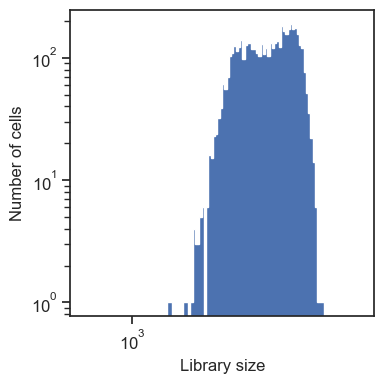

<Axes: xlabel='Library size', ylabel='Number of cells'>

In [89]:
scprep.plot.plot_library_size(matrix, cutoff=cutoff_var)

In [90]:
# filter lowly expressed genes and cells with a small library size
#matrix = scprep.filter.filter_library_size(matrix, cutoff=cutoff_var)
#matrix.head()

Note: Skipped normalization as data is already log-normalized

In [91]:
adata_EC.layers

LayersView with keys: normalized

### Creating the MAGIC operator
If you don't specify parameters, MAGIC creates an operator with the following default values: knn=5, knn_max = 3 * knn, decay=1, t=3.

In [92]:
magic_op = magic.MAGIC()

### Running MAGIC with gene selection
The magic_op.fit_transform function takes the normalized data and an array of selected genes as its arguments. If no genes are provided, MAGIC will return a matrix of all genes. The same can be achieved by substituting the array of gene names with genes='all_genes'.

In [93]:
%%time
emt_magic = magic_op.fit_transform(adata_EC, genes=gg)

Calculating MAGIC...
  Running MAGIC on 4950 cells and 29128 genes.
  Calculating graph and diffusion operator...


C:\Users\sfrerich\AppData\Roaming\Python\Python311\site-packages\magic\magic.py:425: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(


    Calculating PCA...
    Calculated PCA in 5.38 seconds.
    Calculating KNN search...
    Calculated KNN search in 2.92 seconds.
    Calculating affinities...


C:\Users\sfrerich\AppData\Roaming\Python\Python311\site-packages\graphtools\graphs.py:290: RuntimeWarning: Detected zero distance between 516 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


    Calculated affinities in 2.99 seconds.
  Calculated graph and diffusion operator in 11.56 seconds.
  Calculating imputation...
Calculated MAGIC in 12.01 seconds.
CPU times: total: 26.4 s
Wall time: 12 s


### Visualizing gene-gene relationships

We can see gene-gene relationships much more clearly after applying MAGIC. Note that the change in absolute values of gene expression is not meaningful - the relative difference is all that matters.

In [94]:
np.corrcoef(emt_magic[:,['FOXF2','FOXO1']].X, rowvar = False)[0][1]

0.04880411284376483

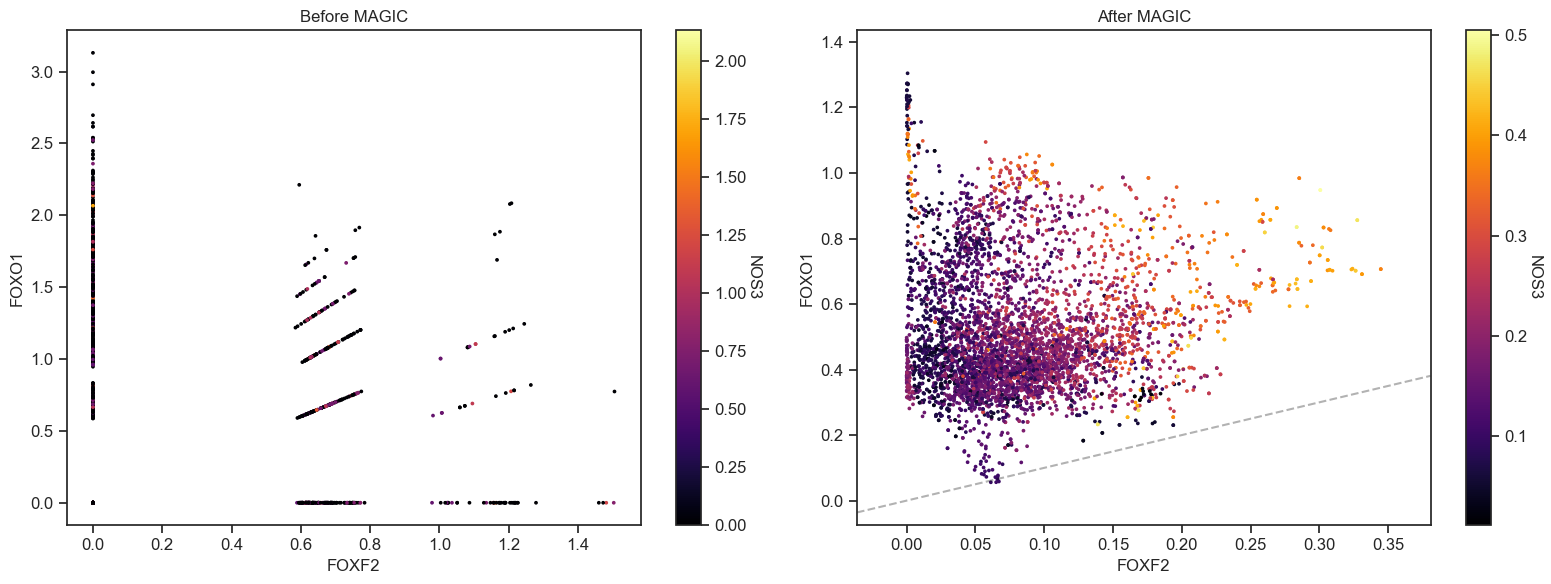

In [95]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))
scprep.plot.scatter(x=adata_EC[:,'FOXF2'].X, y=adata_EC[:,'FOXO1'].X, c=adata_EC[:,'NOS3'].X, ax = ax1,
                    xlabel='FOXF2', ylabel='FOXO1', legend_title="NOS3", title='Before MAGIC')
scprep.plot.scatter(x=emt_magic[:,'FOXF2'].X, y=emt_magic[:,'FOXO1'].X, c=emt_magic[:,'NOS3'].X, ax=ax2,
                    xlabel='FOXF2', ylabel='FOXO1', legend_title="NOS3", title='After MAGIC')
plt.axline((0,0), slope=1, color="black", alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()

## PCs

In [96]:
gg = ["FOXF2","FOXO1","NOS3"]

In [97]:
adata_EC = adata[adata.obs.clusters == "Pericytes"]

In [98]:
adata_EC

View of AnnData object with n_obs × n_vars = 329 × 29128
    obs: 'orig.ident', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'Sample', 'nCount_combined', 'nFeature_combined', 'percent.mt', 'softmax', 'nCount_SCT', 'nFeature_SCT', 'clusters2', 'clusters'
    obsm: 'X_umap'
    layers: 'normalized'

In [99]:
adata_EC.layers

LayersView with keys: normalized

In [100]:
#matrix = pd.DataFrame(adata_EC.X) # not compatible with sparse 
matrix = adata_EC.X
matrix.columns = adata_EC.var.index.tolist()

In [101]:
cutoff_var = None

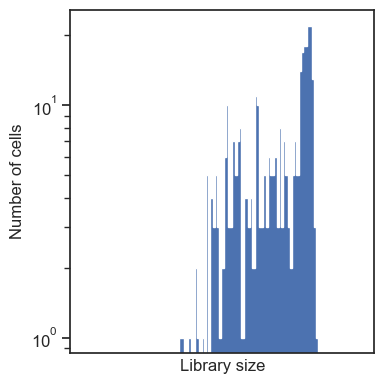

<Axes: xlabel='Library size', ylabel='Number of cells'>

In [102]:
scprep.plot.plot_library_size(matrix, cutoff=cutoff_var)

In [103]:
# filter lowly expressed genes and cells with a small library size
#matrix = scprep.filter.filter_library_size(matrix, cutoff=cutoff_var)
#matrix.head()

Note: Skipped normalization as data is already log-normalized

In [104]:
adata_EC.layers

LayersView with keys: normalized

### Creating the MAGIC operator
If you don't specify parameters, MAGIC creates an operator with the following default values: knn=5, knn_max = 3 * knn, decay=1, t=3.

In [105]:
magic_op = magic.MAGIC()

### Running MAGIC with gene selection
The magic_op.fit_transform function takes the normalized data and an array of selected genes as its arguments. If no genes are provided, MAGIC will return a matrix of all genes. The same can be achieved by substituting the array of gene names with genes='all_genes'.

In [106]:
%%time
emt_magic = magic_op.fit_transform(adata_EC, genes=gg)

Calculating MAGIC...
  Running MAGIC on 329 cells and 29128 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


C:\Users\sfrerich\AppData\Roaming\Python\Python311\site-packages\magic\magic.py:425: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(


    Calculated PCA in 0.54 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.61 seconds.
  Calculating imputation...
Calculated MAGIC in 0.71 seconds.
CPU times: total: 1.92 s
Wall time: 714 ms


C:\Users\sfrerich\AppData\Roaming\Python\Python311\site-packages\graphtools\graphs.py:283: RuntimeWarning: Detected zero distance between samples 33 and 44, 35 and 46, 36 and 47, 37 and 48, 38 and 49, 39 and 51. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


### Visualizing gene-gene relationships

We can see gene-gene relationships much more clearly after applying MAGIC. Note that the change in absolute values of gene expression is not meaningful - the relative difference is all that matters.

In [107]:
np.corrcoef(emt_magic[:,['FOXF2','FOXO1']].X, rowvar = False)[0][1]

0.2646949809161476

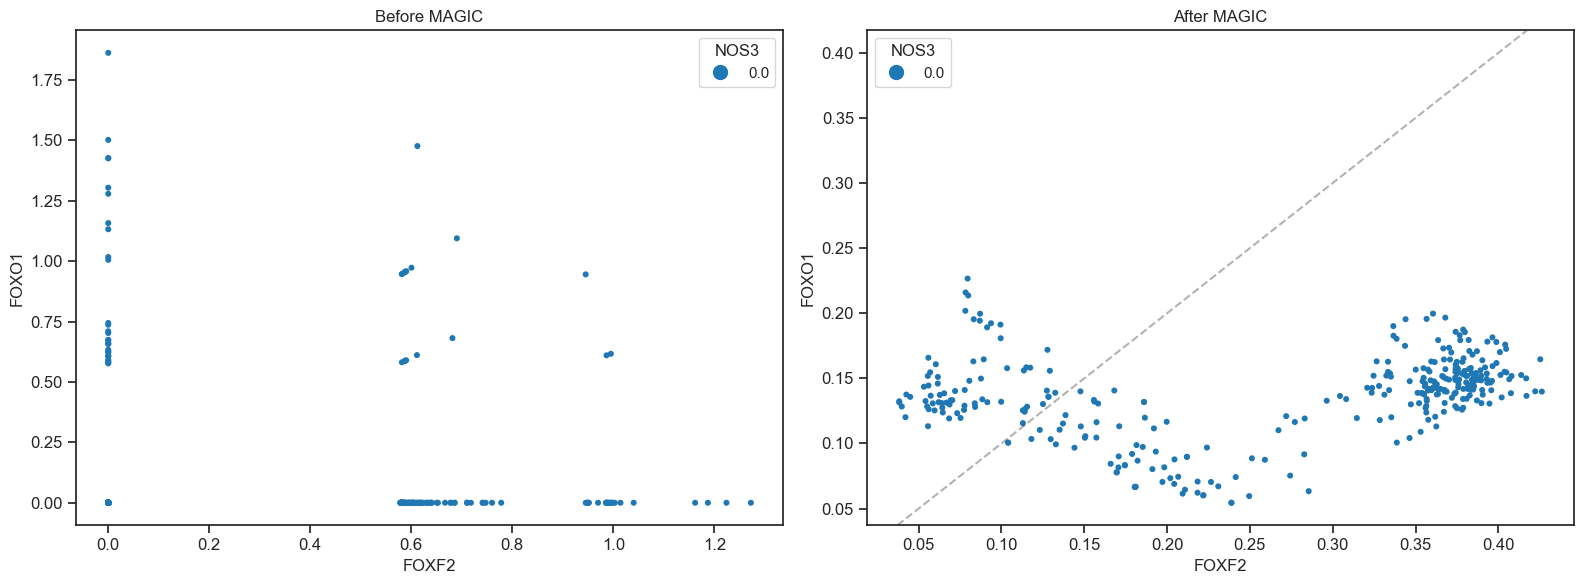

In [108]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))
scprep.plot.scatter(x=adata_EC[:,'FOXF2'].X, y=adata_EC[:,'FOXO1'].X, c=adata_EC[:,'NOS3'].X, ax = ax1,
                    xlabel='FOXF2', ylabel='FOXO1', legend_title="NOS3", title='Before MAGIC')
scprep.plot.scatter(x=emt_magic[:,'FOXF2'].X, y=emt_magic[:,'FOXO1'].X, c=emt_magic[:,'NOS3'].X, ax=ax2,
                    xlabel='FOXF2', ylabel='FOXO1', legend_title="NOS3", title='After MAGIC')
plt.axline((0.4,0.4), slope=1, color="black", alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()

## All cell types

In [109]:
gg = ["FOXF2","FOXO1","NOS3"]

In [110]:
adata_EC = adata

In [111]:
adata_EC

AnnData object with n_obs × n_vars = 54503 × 29128
    obs: 'orig.ident', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'Sample', 'nCount_combined', 'nFeature_combined', 'percent.mt', 'softmax', 'nCount_SCT', 'nFeature_SCT', 'clusters2', 'clusters'
    obsm: 'X_umap'
    layers: 'normalized'

In [112]:
adata_EC.layers

Layers with keys: normalized

In [113]:
#matrix = pd.DataFrame(adata_EC.X) # not compatible with sparse 
matrix = adata_EC.X
matrix.columns = adata_EC.var.index.tolist()

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
cutoff_var = None

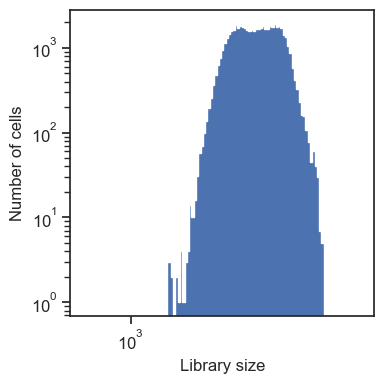

<Axes: xlabel='Library size', ylabel='Number of cells'>

In [114]:
scprep.plot.plot_library_size(matrix, cutoff=cutoff_var)

In [115]:
# filter lowly expressed genes and cells with a small library size
#matrix = scprep.filter.filter_library_size(matrix, cutoff=cutoff_var)
#matrix.head()

Note: Skipped normalization as data is already log-normalized

In [116]:
adata_EC.layers

Layers with keys: normalized

### Creating the MAGIC operator
If you don't specify parameters, MAGIC creates an operator with the following default values: knn=5, knn_max = 3 * knn, decay=1, t=3.

In [117]:
magic_op = magic.MAGIC()

### Running MAGIC with gene selection
The magic_op.fit_transform function takes the normalized data and an array of selected genes as its arguments. If no genes are provided, MAGIC will return a matrix of all genes. The same can be achieved by substituting the array of gene names with genes='all_genes'.

In [118]:
%%time
emt_magic = magic_op.fit_transform(adata_EC, genes=gg)

Calculating MAGIC...
  Running MAGIC on 54503 cells and 29128 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


C:\Users\sfrerich\AppData\Roaming\Python\Python311\site-packages\magic\magic.py:425: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(


    Calculated PCA in 58.64 seconds.
    Calculating KNN search...
    Calculated KNN search in 484.23 seconds.
    Calculating affinities...


C:\Users\sfrerich\AppData\Roaming\Python\Python311\site-packages\graphtools\graphs.py:290: RuntimeWarning: Detected zero distance between 5917 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


    Calculated affinities in 436.43 seconds.
  Calculated graph and diffusion operator in 979.38 seconds.
  Calculating imputation...
  Calculated imputation in 0.02 seconds.
Calculated MAGIC in 981.85 seconds.
CPU times: total: 18min 59s
Wall time: 16min 21s


### Visualizing gene-gene relationships

We can see gene-gene relationships much more clearly after applying MAGIC. Note that the change in absolute values of gene expression is not meaningful - the relative difference is all that matters.

In [120]:
np.corrcoef(emt_magic[:,['FOXF2','FOXO1']].X, rowvar = False)[0][1]

0.47219464812294976

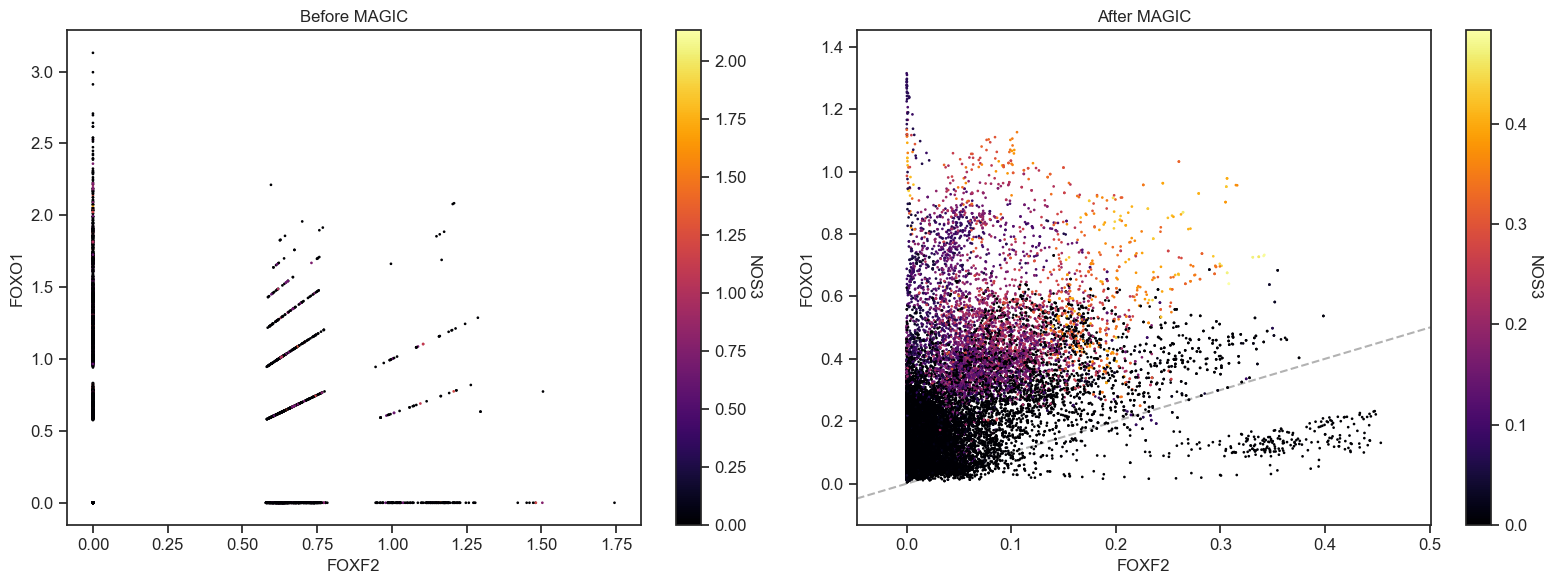

In [121]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))
scprep.plot.scatter(x=adata_EC[:,'FOXF2'].X, y=adata_EC[:,'FOXO1'].X, c=adata_EC[:,'NOS3'].X, ax = ax1,
                    xlabel='FOXF2', ylabel='FOXO1', legend_title="NOS3", title='Before MAGIC')
scprep.plot.scatter(x=emt_magic[:,'FOXF2'].X, y=emt_magic[:,'FOXO1'].X, c=emt_magic[:,'NOS3'].X, ax=ax2,
                    xlabel='FOXF2', ylabel='FOXO1', legend_title="NOS3", title='After MAGIC')
plt.axline((0,0), slope=1, color="black", alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()

## capECs

In [122]:
gg = ["FOXF2","FOXO1","NOS3"]

In [123]:
adata_EC = adata[adata.obs.clusters2 == "ECs_Capillary"]

In [124]:
adata_EC

View of AnnData object with n_obs × n_vars = 165 × 29128
    obs: 'orig.ident', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'Sample', 'nCount_combined', 'nFeature_combined', 'percent.mt', 'softmax', 'nCount_SCT', 'nFeature_SCT', 'clusters2', 'clusters'
    obsm: 'X_umap'
    layers: 'normalized'

In [125]:
adata_EC.layers

LayersView with keys: normalized

In [126]:
#matrix = pd.DataFrame(adata_EC.X) # not compatible with sparse 
matrix = adata_EC.X
matrix.columns = adata_EC.var.index.tolist()

In [127]:
cutoff_var = None

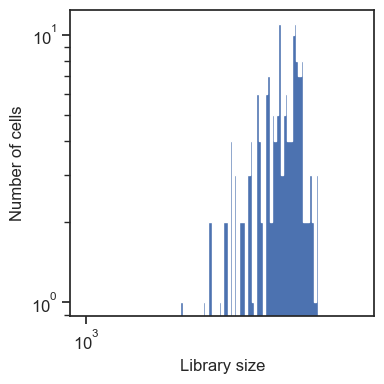

<Axes: xlabel='Library size', ylabel='Number of cells'>

In [128]:
scprep.plot.plot_library_size(matrix, cutoff=cutoff_var)

In [129]:
# filter lowly expressed genes and cells with a small library size
#matrix = scprep.filter.filter_library_size(matrix, cutoff=cutoff_var)
#matrix.head()

Note: Skipped normalization as data is already log-normalized

In [130]:
adata_EC.layers

LayersView with keys: normalized

### Creating the MAGIC operator
If you don't specify parameters, MAGIC creates an operator with the following default values: knn=5, knn_max = 3 * knn, decay=1, t=3.

In [131]:
magic_op = magic.MAGIC()

### Running MAGIC with gene selection
The magic_op.fit_transform function takes the normalized data and an array of selected genes as its arguments. If no genes are provided, MAGIC will return a matrix of all genes. The same can be achieved by substituting the array of gene names with genes='all_genes'.

In [132]:
%%time
emt_magic = magic_op.fit_transform(adata_EC, genes=gg)

Calculating MAGIC...
  Running MAGIC on 165 cells and 29128 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


C:\Users\sfrerich\AppData\Roaming\Python\Python311\site-packages\magic\magic.py:425: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(


    Calculated PCA in 0.45 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.48 seconds.
  Calculating imputation...
Calculated MAGIC in 0.57 seconds.
CPU times: total: 1.52 s
Wall time: 575 ms


C:\Users\sfrerich\AppData\Roaming\Python\Python311\site-packages\graphtools\graphs.py:290: RuntimeWarning: Detected zero distance between 17 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


### Visualizing gene-gene relationships

We can see gene-gene relationships much more clearly after applying MAGIC. Note that the change in absolute values of gene expression is not meaningful - the relative difference is all that matters.

In [133]:
np.corrcoef(emt_magic[:,['FOXF2','FOXO1']].X, rowvar = False)[0][1]

-0.028910513191941593

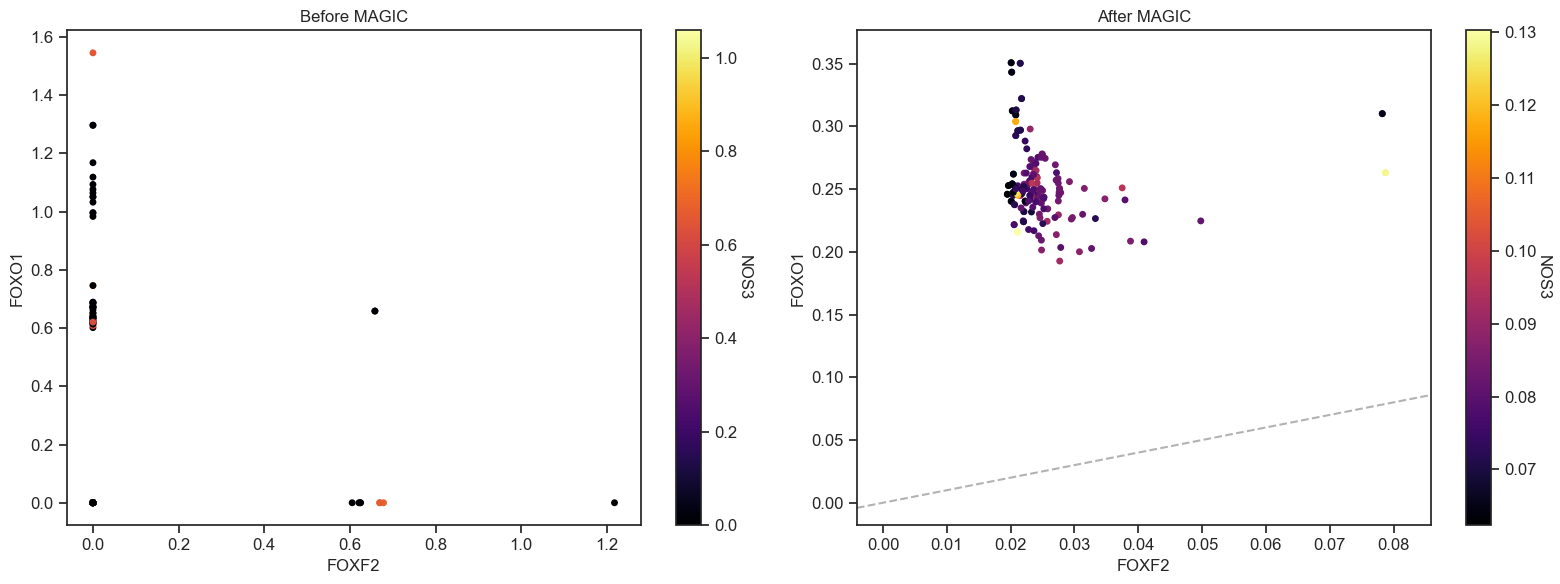

In [134]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))
scprep.plot.scatter(x=adata_EC[:,'FOXF2'].X, y=adata_EC[:,'FOXO1'].X, c=adata_EC[:,'NOS3'].X, ax = ax1,
                    xlabel='FOXF2', ylabel='FOXO1', legend_title="NOS3", title='Before MAGIC')
scprep.plot.scatter(x=emt_magic[:,'FOXF2'].X, y=emt_magic[:,'FOXO1'].X, c=emt_magic[:,'NOS3'].X, ax=ax2,
                    xlabel='FOXF2', ylabel='FOXO1', legend_title="NOS3", title='After MAGIC')
plt.axline((0,0), slope=1, color="black", alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()

## aECs

In [135]:
gg = ["FOXF2","FOXO1","NOS3"]

In [136]:
adata_EC = adata[adata.obs.clusters2 == "ECs_Arterial"]

In [137]:
adata_EC

View of AnnData object with n_obs × n_vars = 2886 × 29128
    obs: 'orig.ident', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'Sample', 'nCount_combined', 'nFeature_combined', 'percent.mt', 'softmax', 'nCount_SCT', 'nFeature_SCT', 'clusters2', 'clusters'
    obsm: 'X_umap'
    layers: 'normalized'

In [138]:
adata_EC.layers

LayersView with keys: normalized

In [139]:
#matrix = pd.DataFrame(adata_EC.X) # not compatible with sparse 
matrix = adata_EC.X
matrix.columns = adata_EC.var.index.tolist()

In [140]:
cutoff_var = None

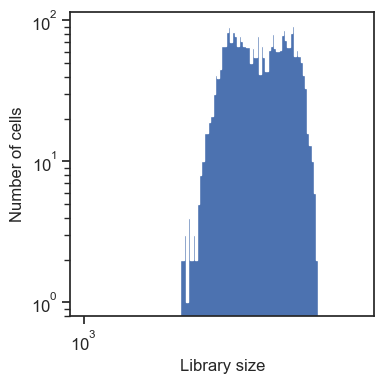

<Axes: xlabel='Library size', ylabel='Number of cells'>

In [141]:
scprep.plot.plot_library_size(matrix, cutoff=cutoff_var)

In [142]:
# filter lowly expressed genes and cells with a small library size
#matrix = scprep.filter.filter_library_size(matrix, cutoff=cutoff_var)
#matrix.head()

Note: Skipped normalization as data is already log-normalized

In [143]:
adata_EC.layers

LayersView with keys: normalized

### Creating the MAGIC operator
If you don't specify parameters, MAGIC creates an operator with the following default values: knn=5, knn_max = 3 * knn, decay=1, t=3.

In [144]:
magic_op = magic.MAGIC()

### Running MAGIC with gene selection
The magic_op.fit_transform function takes the normalized data and an array of selected genes as its arguments. If no genes are provided, MAGIC will return a matrix of all genes. The same can be achieved by substituting the array of gene names with genes='all_genes'.

In [145]:
%%time
emt_magic = magic_op.fit_transform(adata_EC, genes=gg)

Calculating MAGIC...
  Running MAGIC on 2886 cells and 29128 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


C:\Users\sfrerich\AppData\Roaming\Python\Python311\site-packages\magic\magic.py:425: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(


    Calculated PCA in 3.20 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.93 seconds.
    Calculating affinities...


C:\Users\sfrerich\AppData\Roaming\Python\Python311\site-packages\graphtools\graphs.py:290: RuntimeWarning: Detected zero distance between 156 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


    Calculated affinities in 0.95 seconds.
  Calculated graph and diffusion operator in 5.24 seconds.
  Calculating imputation...
Calculated MAGIC in 5.51 seconds.
CPU times: total: 14 s
Wall time: 5.51 s


### Visualizing gene-gene relationships

We can see gene-gene relationships much more clearly after applying MAGIC. Note that the change in absolute values of gene expression is not meaningful - the relative difference is all that matters.

In [146]:
np.corrcoef(emt_magic[:,['FOXF2','FOXO1']].X, rowvar = False)[0][1]

0.15339435830835435

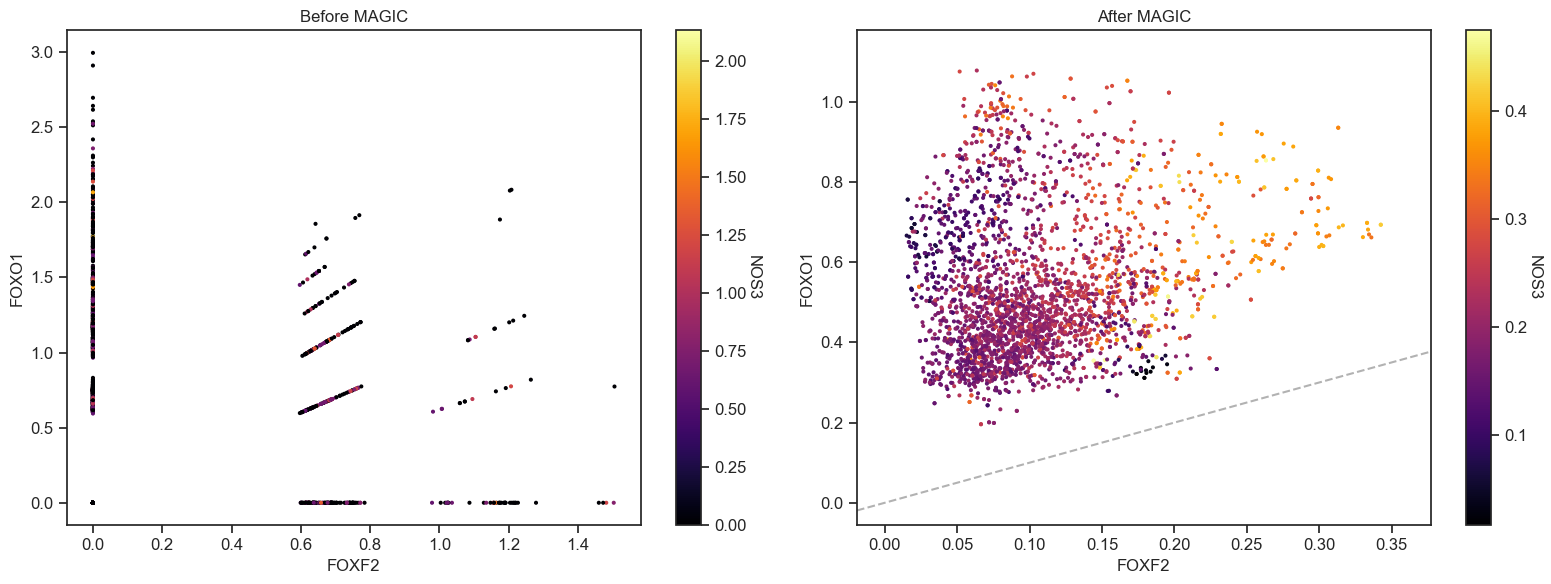

In [147]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))
scprep.plot.scatter(x=adata_EC[:,'FOXF2'].X, y=adata_EC[:,'FOXO1'].X, c=adata_EC[:,'NOS3'].X, ax = ax1,
                    xlabel='FOXF2', ylabel='FOXO1', legend_title="NOS3", title='Before MAGIC')
scprep.plot.scatter(x=emt_magic[:,'FOXF2'].X, y=emt_magic[:,'FOXO1'].X, c=emt_magic[:,'NOS3'].X, ax=ax2,
                    xlabel='FOXF2', ylabel='FOXO1', legend_title="NOS3", title='After MAGIC')
plt.axline((0,0), slope=1, color="black", alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()

## vECs

In [148]:
gg = ["FOXF2","FOXO1","NOS3"]

In [149]:
adata_EC = adata[adata.obs.clusters2 == "ECs_Venous"]

In [150]:
adata_EC

View of AnnData object with n_obs × n_vars = 1899 × 29128
    obs: 'orig.ident', 'nCount_spliced', 'nFeature_spliced', 'nCount_unspliced', 'nFeature_unspliced', 'Sample', 'nCount_combined', 'nFeature_combined', 'percent.mt', 'softmax', 'nCount_SCT', 'nFeature_SCT', 'clusters2', 'clusters'
    obsm: 'X_umap'
    layers: 'normalized'

In [151]:
adata_EC.layers

LayersView with keys: normalized

In [152]:
#matrix = pd.DataFrame(adata_EC.X) # not compatible with sparse 
matrix = adata_EC.X
matrix.columns = adata_EC.var.index.tolist()

In [153]:
cutoff_var = None

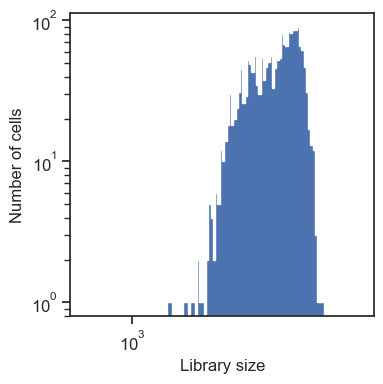

<Axes: xlabel='Library size', ylabel='Number of cells'>

In [154]:
scprep.plot.plot_library_size(matrix, cutoff=cutoff_var)

In [155]:
# filter lowly expressed genes and cells with a small library size
#matrix = scprep.filter.filter_library_size(matrix, cutoff=cutoff_var)
#matrix.head()

Note: Skipped normalization as data is already log-normalized

In [156]:
adata_EC.layers

LayersView with keys: normalized

### Creating the MAGIC operator
If you don't specify parameters, MAGIC creates an operator with the following default values: knn=5, knn_max = 3 * knn, decay=1, t=3.

In [157]:
magic_op = magic.MAGIC()

### Running MAGIC with gene selection
The magic_op.fit_transform function takes the normalized data and an array of selected genes as its arguments. If no genes are provided, MAGIC will return a matrix of all genes. The same can be achieved by substituting the array of gene names with genes='all_genes'.

In [158]:
%%time
emt_magic = magic_op.fit_transform(adata_EC, genes=gg)

Calculating MAGIC...
  Running MAGIC on 1899 cells and 29128 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...


C:\Users\sfrerich\AppData\Roaming\Python\Python311\site-packages\magic\magic.py:425: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(


    Calculated PCA in 2.22 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.39 seconds.
    Calculating affinities...


C:\Users\sfrerich\AppData\Roaming\Python\Python311\site-packages\graphtools\graphs.py:290: RuntimeWarning: Detected zero distance between 12 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(


    Calculated affinities in 0.39 seconds.
  Calculated graph and diffusion operator in 3.09 seconds.
  Calculating imputation...
Calculated MAGIC in 3.31 seconds.
CPU times: total: 9.59 s
Wall time: 3.31 s


### Visualizing gene-gene relationships

We can see gene-gene relationships much more clearly after applying MAGIC. Note that the change in absolute values of gene expression is not meaningful - the relative difference is all that matters.

In [159]:
np.corrcoef(emt_magic[:,['FOXF2','FOXO1']].X, rowvar = False)[0][1]

-0.38683976081188426

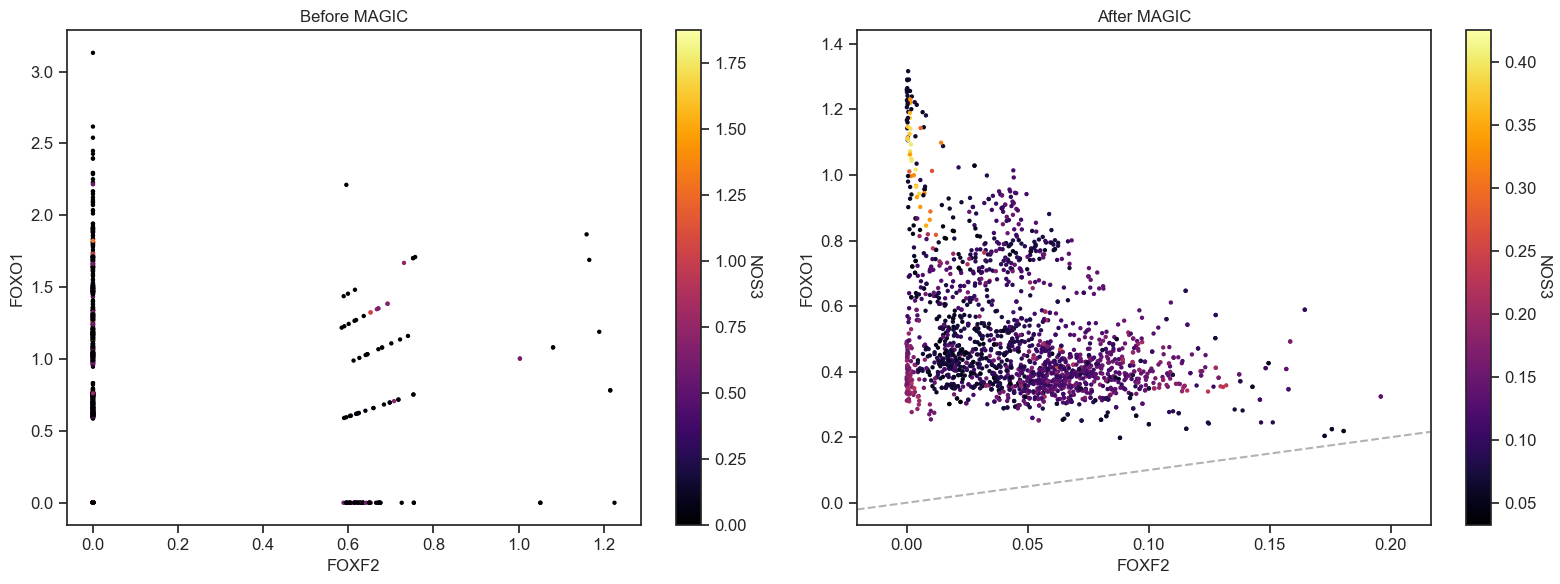

In [160]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6))
scprep.plot.scatter(x=adata_EC[:,'FOXF2'].X, y=adata_EC[:,'FOXO1'].X, c=adata_EC[:,'NOS3'].X, ax = ax1,
                    xlabel='FOXF2', ylabel='FOXO1', legend_title="NOS3", title='Before MAGIC')
scprep.plot.scatter(x=emt_magic[:,'FOXF2'].X, y=emt_magic[:,'FOXO1'].X, c=emt_magic[:,'NOS3'].X, ax=ax2,
                    xlabel='FOXF2', ylabel='FOXO1', legend_title="NOS3", title='After MAGIC')
plt.axline((0,0), slope=1, color="black", alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()

# Session Info

In [161]:
sc.logging.print_versions()

-----
anndata     0.9.2
scanpy      1.9.4
-----
PIL                 10.0.0
anyio               NA
asttokens           NA
attr                22.1.0
babel               2.11.0
backcall            0.2.0
brotli              NA
certifi             2023.07.22
cffi                1.15.1
charset_normalizer  2.0.4
colorama            0.4.6
comm                0.1.2
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
defusedxml          0.7.1
deprecated          1.2.14
entrypoints         0.4
executing           0.8.3
fastjsonschema      NA
future              0.18.3
graphtools          1.5.3
h5py                3.9.0
idna                3.4
igraph              0.10.4
ipykernel           6.25.0
ipython_genutils    0.2.0
ipywidgets          8.0.4
jedi                0.18.1
jinja2              3.0.3
joblib              1.3.2
json5               NA
jsonschema          4.17.3
jupyter_server      1.23.4
jupyterlab_server   2